Forecasting of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job
Book source: Timeseries forecasting in Python (Manning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition
Based on techniques from book Python Data Science Essentials and Timeseries forecasting in Python

In [2]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv")
medium_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,2907.0,1.681567e+09,264503.978524,1.681117e+09,1.681341e+09,1.681562e+09,1.681785e+09,1.682067e+09
availability,2907.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
avg_alloc_mem,2907.0,1.204111e+05,17483.228132,7.697429e+04,1.059050e+05,1.194400e+05,1.354903e+05,1.688000e+05
avg_allocated_cpus_per_job,2907.0,7.533300e+02,148.429907,4.410237e+02,6.230638e+02,7.477361e+02,8.619719e+02,1.123797e+03
avg_allocated_nodes_per_job,2907.0,2.942695e+00,0.579804,1.722749e+00,2.433843e+00,2.920844e+00,3.367078e+00,4.389831e+00
avg_cpus_load_lower,2907.0,4.542350e+01,17.404582,0.000000e+00,3.328000e+01,4.405333e+01,5.707029e+01,1.738967e+02
avg_cpus_load_upper,2907.0,1.319634e+02,52.804867,5.994000e+01,9.718000e+01,1.133900e+02,1.485533e+02,3.377600e+02
avg_execution_time_per_job,2907.0,5.374966e+04,12526.187749,2.114197e+04,4.410989e+04,5.347724e+04,6.302716e+04,1.071112e+05
avg_free_mem_lower,2907.0,1.750444e+05,16502.883473,7.312750e+04,1.661032e+05,1.785488e+05,1.857589e+05,2.059942e+05
avg_free_mem_upper,2907.0,2.295526e+05,9153.499389,1.927495e+05,2.228622e+05,2.290420e+05,2.375682e+05,2.489415e+05


In [3]:
# 1- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,2907.0,120411.057794,17483.228132,76974.285714,105905.000000,119440.000000,135490.285714,168800.000000
avg_allocated_cpus_per_job,2907.0,753.330036,148.429907,441.023697,623.063785,747.736148,861.971851,1123.796610
avg_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831
avg_cpus_load_lower,2907.0,45.423498,17.404582,0.000000,33.280000,44.053333,57.070286,173.896667
avg_cpus_load_upper,2907.0,131.963401,52.804867,59.940000,97.180000,113.390000,148.553333,337.760000
avg_execution_time_per_job,2907.0,53749.655102,12526.187749,21141.968944,44109.890100,53477.244980,63027.162126,107111.226316
avg_free_mem_lower,2907.0,175044.364796,16502.883473,73127.500000,166103.166667,178548.833333,185758.857143,205994.250000
avg_free_mem_upper,2907.0,229552.567433,9153.499389,192749.500000,222862.166667,229042.000000,237568.214286,248941.500000
avg_maximum_allocated_cpus_per_job,2907.0,641.930566,103.553341,397.665653,557.948718,625.180812,726.262527,888.784314
avg_maximum_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831


Our target is to forecast the avg_queue_time_per_job based on other features in dataset

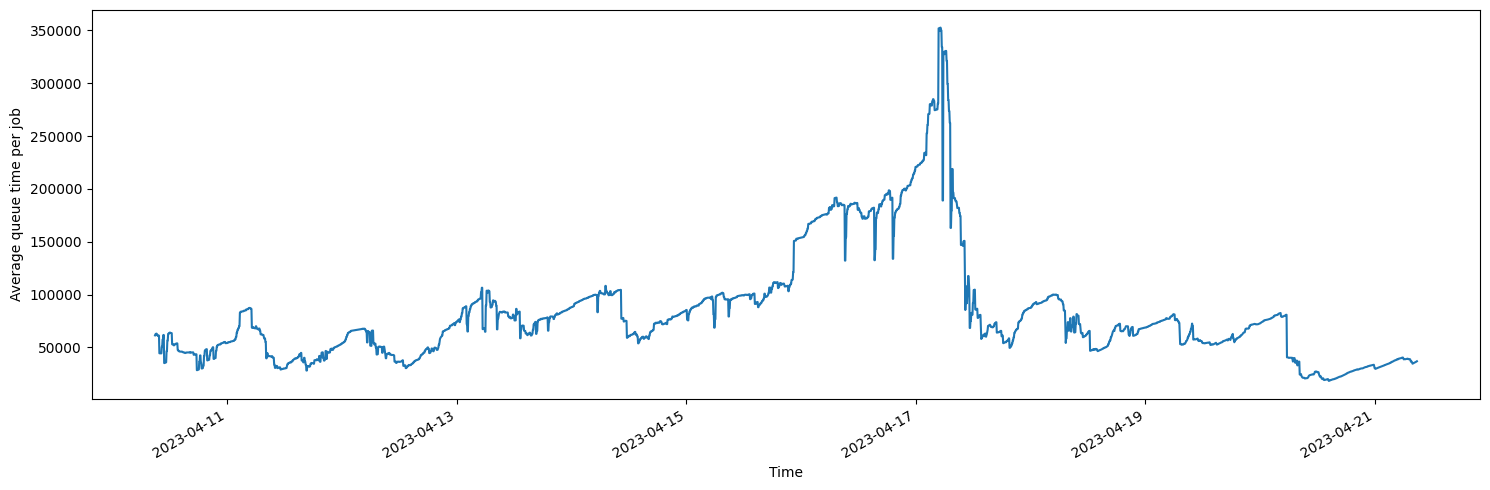

In [4]:
avg_job_queue_time = medium_df['avg_queue_time_per_job']
time_index = medium_df.index
fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Average queue time per job")
fig.set_size_inches(15, 5)
ax.plot(time_index, avg_job_queue_time)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Analyse seasonality with Fast Fourier Transform (FFT)
No seasonality is detected

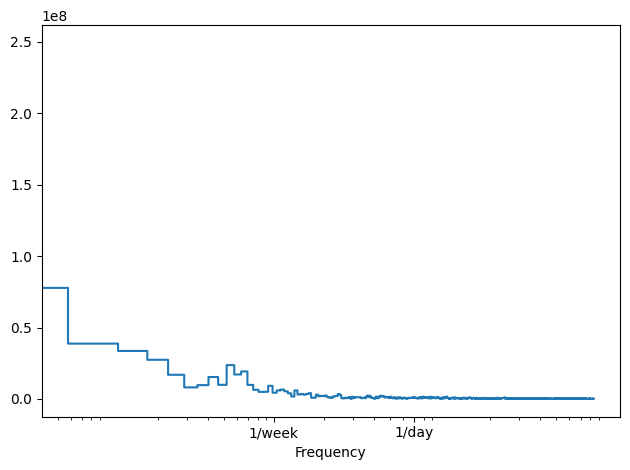

In [202]:
import tensorflow as tf
fft = tf.signal.rfft(medium_df['avg_queue_time_per_job'])

f_per_dataset = np.arange(0, len(fft))
n_sample_h = len(medium_df['avg_queue_time_per_job'])

hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week
f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
def determine_dropped_colums(df: pd.core.frame.DataFrame, df_selected: np.ndarray):
    original_columns = df.columns
    dropped_columns = []
    index = -1
    for value in df.iloc[0]:
        index += 1
        if value not in df_selected[0]:
            dropped_columns.append(original_columns[index])
    return dropped_columns

Feature selection: drop features with low variance

In [7]:
from sklearn.feature_selection import VarianceThreshold
medium_df_selected = VarianceThreshold(threshold=1.0).fit_transform(medium_df)
dropped_columns = determine_dropped_colums(medium_df, medium_df_selected)
old_columns = medium_df.columns
new_columns = old_columns.drop(dropped_columns)
medium_df_selected = pd.DataFrame(medium_df_selected, columns=new_columns, index=medium_df.index)
medium_df_selected.describe().transpose()
# These columns should have been removed from dataset: avg_allocated_nodes_per_job, avg_maximum_allocated_nodes_per_job, avg_minimum_requested_nodes_per_job

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,2907.0,120411.057794,17483.228132,76974.285714,105905.000000,119440.000000,135490.285714,168800.000000
avg_allocated_cpus_per_job,2907.0,753.330036,148.429907,441.023697,623.063785,747.736148,861.971851,1123.796610
avg_cpus_load_lower,2907.0,45.423498,17.404582,0.000000,33.280000,44.053333,57.070286,173.896667
avg_cpus_load_upper,2907.0,131.963401,52.804867,59.940000,97.180000,113.390000,148.553333,337.760000
avg_execution_time_per_job,2907.0,53749.655102,12526.187749,21141.968944,44109.890100,53477.244980,63027.162126,107111.226316
avg_free_mem_lower,2907.0,175044.364796,16502.883473,73127.500000,166103.166667,178548.833333,185758.857143,205994.250000
avg_free_mem_upper,2907.0,229552.567433,9153.499389,192749.500000,222862.166667,229042.000000,237568.214286,248941.500000
avg_maximum_allocated_cpus_per_job,2907.0,641.930566,103.553341,397.665653,557.948718,625.180812,726.262527,888.784314
avg_minimum_requested_cpus_per_job,2907.0,114.200666,12.391759,69.795455,106.023517,118.568093,121.879547,139.260536
avg_minimum_requested_memory_per_job,2907.0,228833.477187,16755.996959,130424.316109,232367.384735,236215.969582,237725.517241,239915.587530


Split dataset into train, validation and test

In [8]:
X_columns = medium_df_selected.columns.drop("avg_queue_time_per_job")
X = medium_df_selected[X_columns]
y = medium_df_selected["avg_queue_time_per_job"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
n = len(medium_df_selected)
train_df = medium_df_selected[0:int(0.7*n)] # 70% 
val_df = medium_df_selected[int(0.7*n):int(0.9*n)] # 20%
test_df = medium_df_selected[int(0.9*n):] # 10%

Scale dataset to range [0, 1] for better ML model performance and lower training time

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df)
columns = train_df.columns
index = train_df.index
train_df = pd.DataFrame(scaler.transform(train_df[train_df.columns]), columns=train_df.columns, index=train_df.index)
val_df = pd.DataFrame(scaler.transform(val_df[val_df.columns]), columns=val_df.columns, index=val_df.index)
test_df = pd.DataFrame(scaler.transform(test_df[test_df.columns]), columns=test_df.columns, index=test_df.index)

Data windowing
Code taken from TimeSeries Forecasting in Python: https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH13%26CH14/CH13%20%26%20CH14.ipynb

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
class DataWindow():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='avg_queue_time_per_job', max_subplots=3):
        inputs, labels = self.sample_batch
        
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

1- Defining baseline models (for performance comparison)

In [89]:
from keras import Model, Sequential

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError

from keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell, GRU

import warnings
warnings.filterwarnings('ignore')

1.1- Single-step baseline model

In [15]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['avg_queue_time_per_job'])
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['avg_queue_time_per_job'])

In [16]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
        
        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

In [17]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
baseline_last = Baseline(label_index=column_indices['avg_queue_time_per_job'])
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [18]:
val_performance = {}
performance = {}

val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

19/19 [==============================] - 0s 3ms/step - loss: 6.3453e-05 - mean_absolute_error: 0.0028


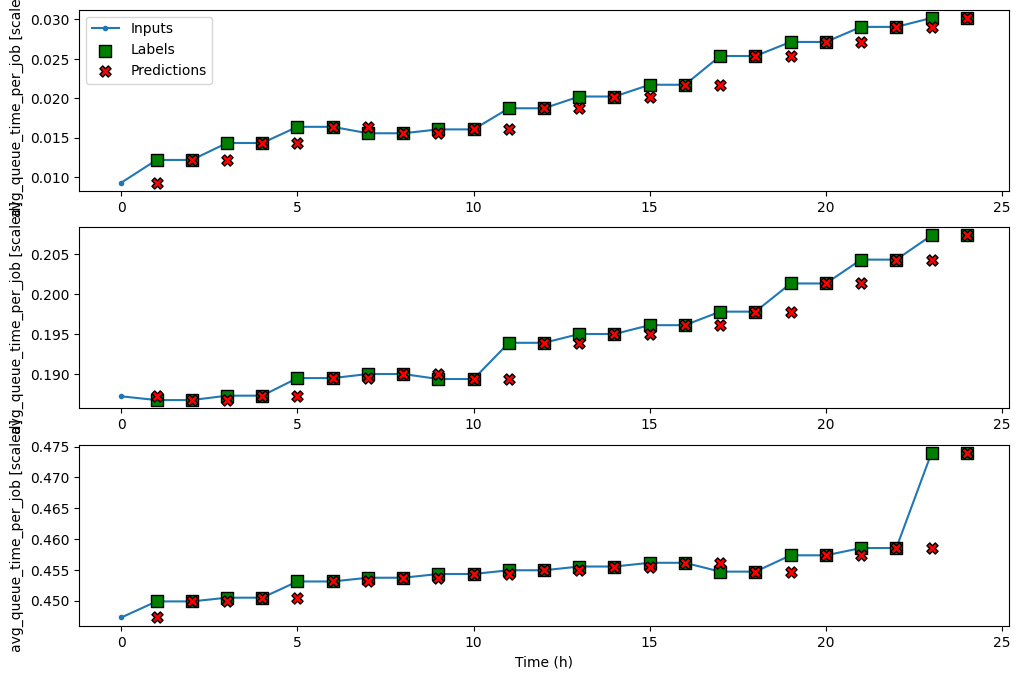

In [19]:
wide_window.plot(baseline_last)

In [20]:
print(performance['Baseline - Last'][1])

0.0017316513694822788


1.2- Multi-step baseline models

In [148]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['avg_queue_time_per_job'])

1.2.1- Predicting the last known value

In [22]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 24, 1])
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])

In [23]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['avg_queue_time_per_job'])
ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance = {}
ms_performance = {}
ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.3114 - mean_absolute_error: 0.4599


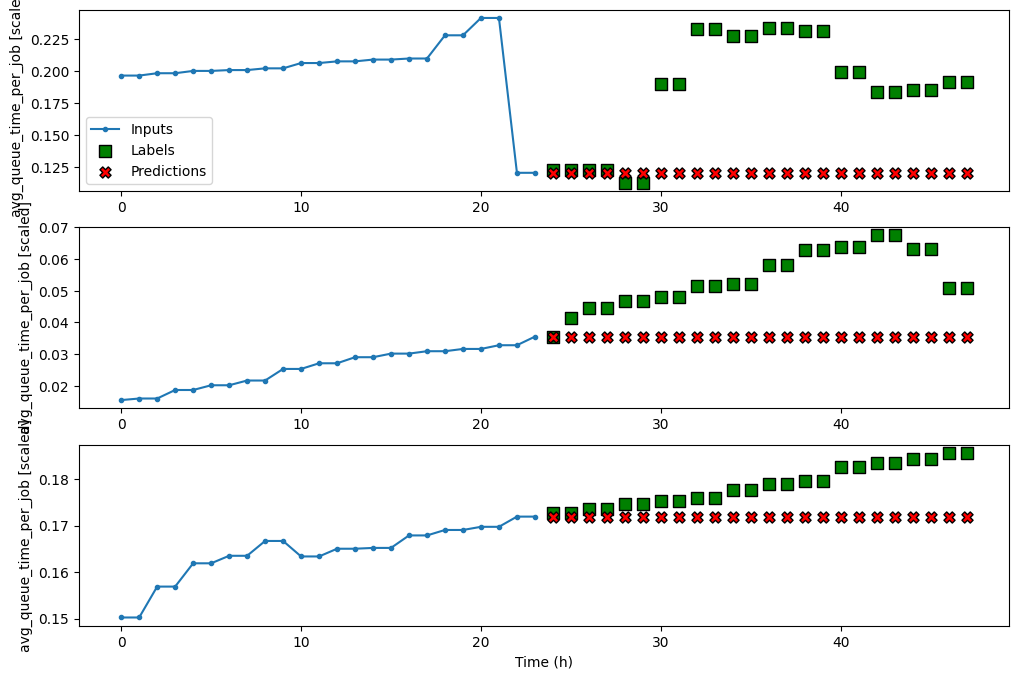

In [24]:
multi_window.plot(ms_baseline_last)

In [25]:
print(ms_performance['Baseline - Last'][1])

0.5721400380134583


1.2.2- Repeating the intut sequence

In [26]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        return inputs[:, :, self.label_index:]

In [27]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['avg_queue_time_per_job'])
ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.3116 - mean_absolute_error: 0.4615


0.5749790668487549


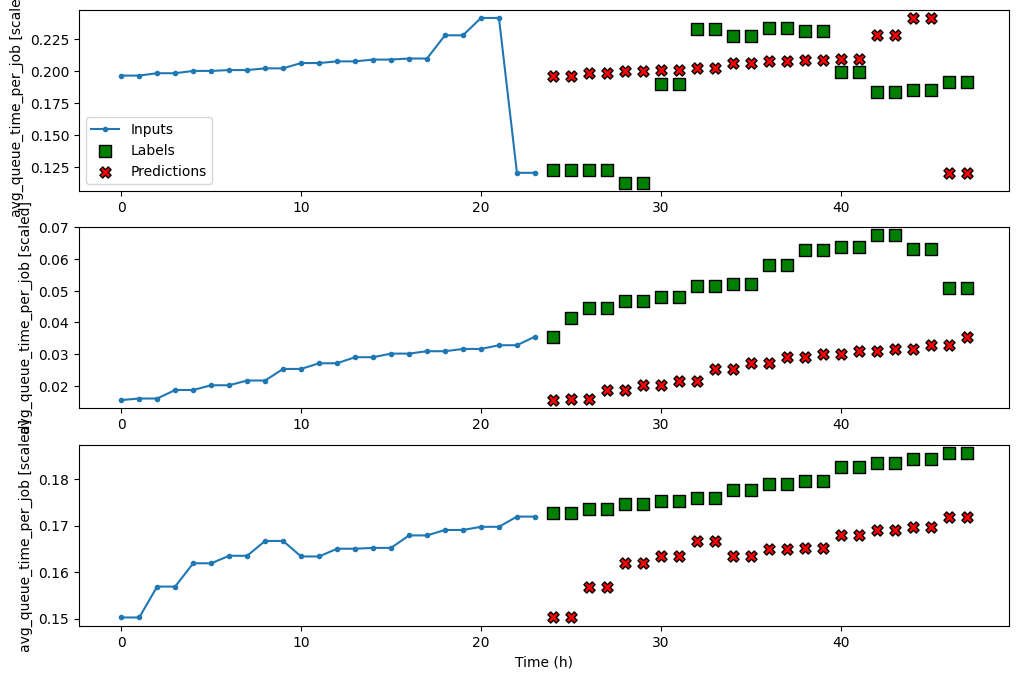

In [28]:
multi_window.plot(ms_baseline_repeat)
print(ms_performance['Baseline - Repeat'][1])

2- Linear model

In [29]:
def compile_and_fit(model, window, patience=3, max_epochs=100):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')
    
    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])
    
    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

2.1- Single step linear model

In [30]:
ss_linear_model = Sequential(
    [
        Dense(units=1) # Number of units is output layer == number of output classes
    ]
)


In [31]:
history = compile_and_fit(model=ss_linear_model,window=single_step_window)
val_performance['Linear'] = ss_linear_model.evaluate(single_step_window.val)
performance['Linear'] = ss_linear_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.1101 - mean_absolute_error: 0.2675 - val_loss: 0.0322 - val_mean_absolute_error: 0.1584
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0810 - mean_absolute_error: 0.2311 - val_loss: 0.0222 - val_mean_absolute_error: 0.1298
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0620 - mean_absolute_error: 0.2059 - val_loss: 0.0148 - val_mean_absolute_error: 0.1040
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0487 - mean_absolute_error: 0.1841 - val_loss: 0.0120 - val_mean_absolute_error: 0.0923
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.1653 - val_loss: 0.0085 - val_mean_absolute_error: 0.0749
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - mean_absolute_error: 0.1486 - val_loss: 0.0068 - val_mean_absolute_error: 0.0652
Epoch 7/100
64/64 [===

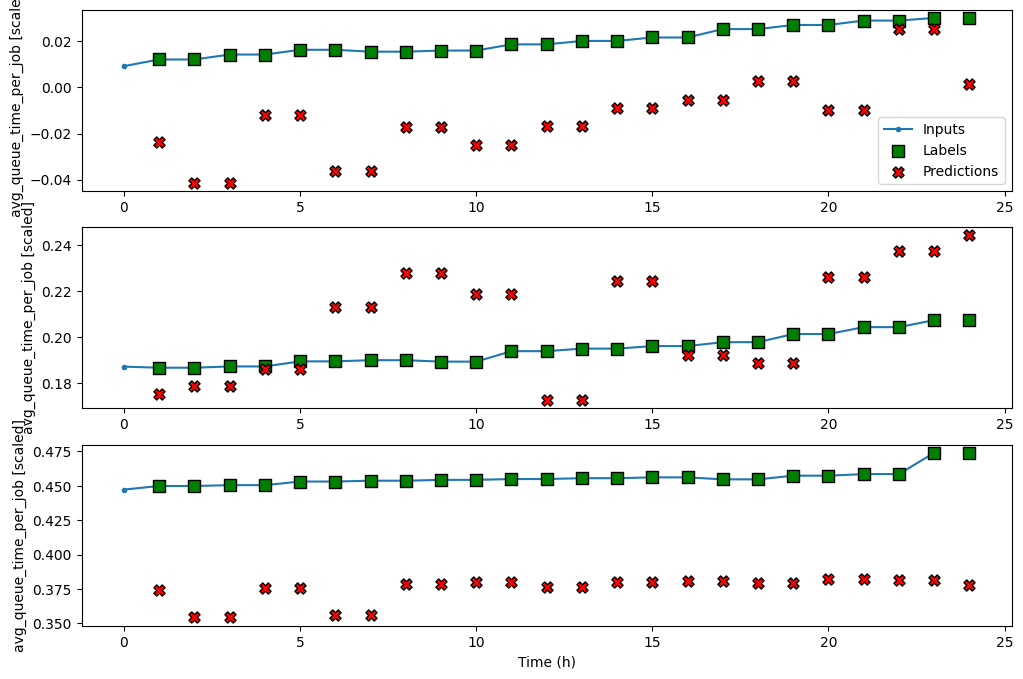

In [32]:
wide_window.plot(ss_linear_model)

In [33]:
print('Single step Performance:')
for index, key in enumerate(performance):
    print(key + ": " + str(performance[key][1]))
print('Single step Validation Performance:')
for index, key in enumerate(val_performance):
    print(key + ": " + str(val_performance[key][1]))

Single step Performance:
Baseline - Last: 0.0017316513694822788
Linear: 0.06173912063241005
Single step Validation Performance:
Baseline - Last: 0.0027847832534462214
Linear: 0.05730430409312248


2.2- Multistep linear model

In [34]:
ms_linear_model = Sequential(
    [
        Dense(units=1, kernel_initializer=tf.initializers.zeros)
    ]
)

In [36]:
history = compile_and_fit(model=ms_linear_model,window=multi_window)
ms_val_performance["Linear"] = ms_linear_model.evaluate(multi_window.val)
ms_performance["Linear"] = ms_linear_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0688 - val_loss: 0.0023 - val_mean_absolute_error: 0.0386
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0073 - mean_absolute_error: 0.0638 - val_loss: 0.0029 - val_mean_absolute_error: 0.0430
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0604 - val_loss: 0.0032 - val_mean_absolute_error: 0.0449
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0434


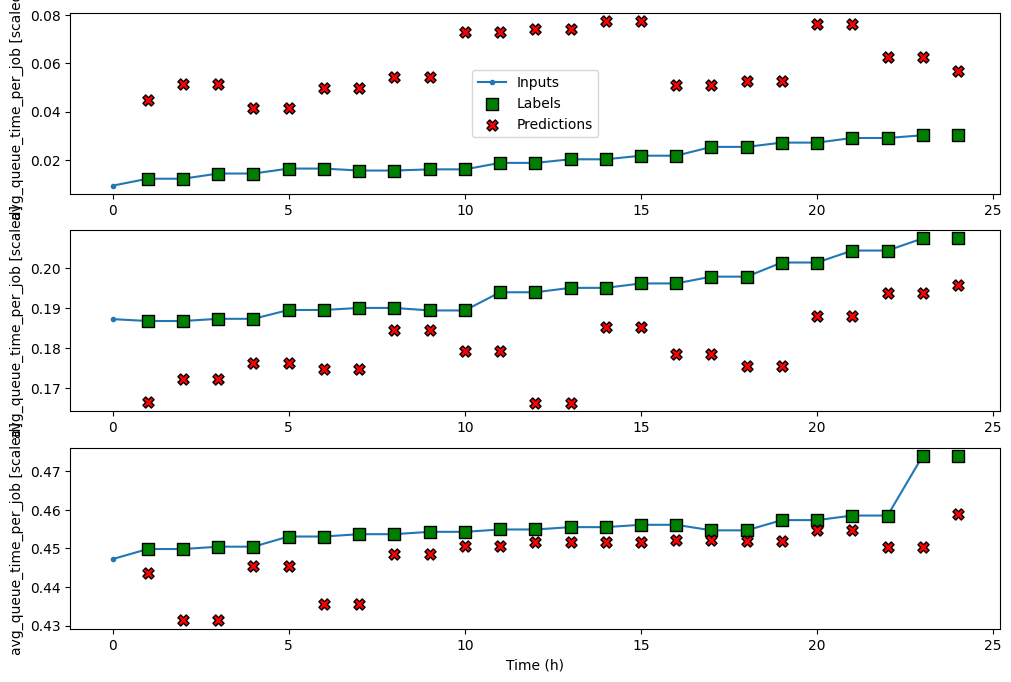

In [63]:
wide_window.plot(ms_linear_model)

In [37]:
print('Multistep Performance:')
for index, key in enumerate(ms_performance):
    print(key + ": " + str(ms_performance[key][1]))
print('Multistep Validation Performance:')
for index, key in enumerate(ms_val_performance):
    print(key + ": " + str(ms_val_performance[key][1]))

Multistep Performance:
Baseline - Last: 0.5721400380134583
Baseline - Repeat: 0.5749790668487549
Linear: 0.07067275792360306
Multistep Validation Performance:
Baseline - Last: 0.459896981716156
Baseline - Repeat: 0.4614982306957245
Linear: 0.04343337193131447


3- Deep Neural (DNN) model 

3.2- Single step DNN model

In [38]:
ss_dnn_model = Sequential(
    [
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=1)
    ]
)

In [39]:
history = compile_and_fit(model=ss_dnn_model, window=single_step_window)
val_performance['DNN'] = ss_dnn_model.evaluate(single_step_window.val)
performance['DNN'] = ss_dnn_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0964 - val_loss: 0.0028 - val_mean_absolute_error: 0.0425
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0291 - val_loss: 0.0035 - val_mean_absolute_error: 0.0480
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 0.0028 - val_mean_absolute_error: 0.0441
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_absolute_error: 0.0199 - val_loss: 0.0052 - val_mean_absolute_error: 0.0568
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 8.6943e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0024 - val_mean_absolute_error: 0.0398
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 8.0937e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0022 - val_mean_absolute_error: 0.0385
Epoch 7/100
64

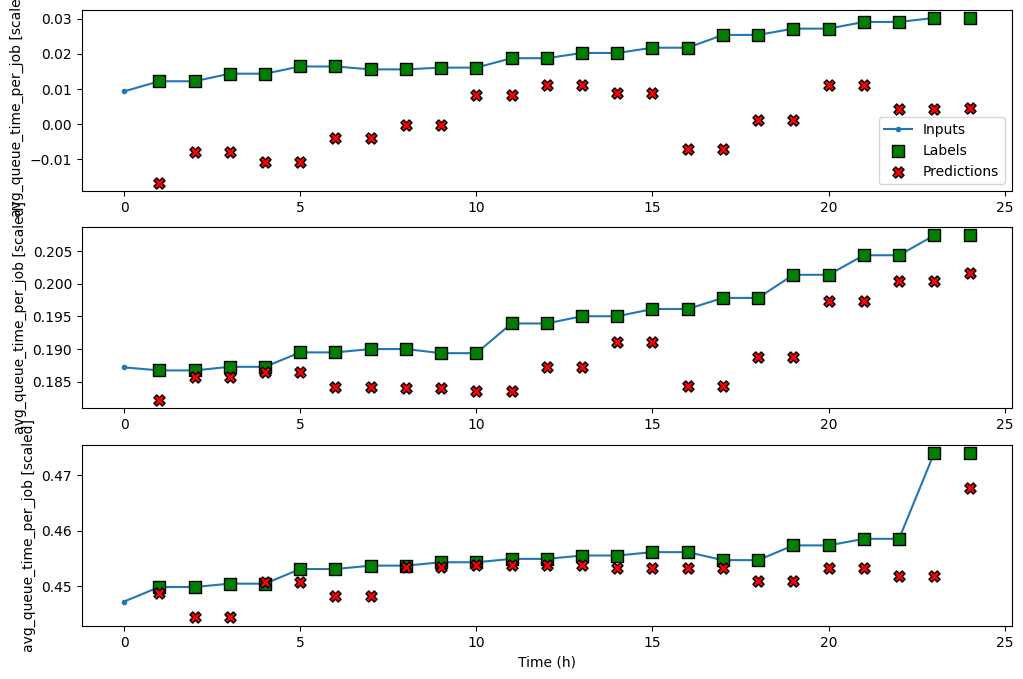

In [40]:
wide_window.plot(ss_dnn_model)

In [41]:
print('Single step Performance:')
for index, key in enumerate(performance):
    print(key + ": " + str(performance[key][1]))
print('Single step Validation Performance:')
for index, key in enumerate(val_performance):
    print(key + ": " + str(val_performance[key][1]))

Single step Performance:
Baseline - Last: 0.0017316513694822788
Linear: 0.06173912063241005
DNN: 0.038652848452329636
Single step Validation Performance:
Baseline - Last: 0.0027847832534462214
Linear: 0.05730430409312248
DNN: 0.03168950229883194


3.3- Multistep DNN model

In [42]:
ms_dnn_model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

In [65]:
history = compile_and_fit(model=ms_dnn_model, window=multi_window)
ms_val_performance['DNN'] = ms_dnn_model.evaluate(multi_window.val)
ms_performance['DNN'] = ms_dnn_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0231 - val_loss: 0.0023 - val_mean_absolute_error: 0.0385
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 0.0022 - val_mean_absolute_error: 0.0385
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0210 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0205 - val_loss: 0.0023 - val_mean_absolute_error: 0.0372
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0205 - val_loss: 0.0024 - val_mean_absolute_error: 0.0379
Epoch 7/100
63/63 [===

In [44]:
print('Multistep Performance:')
for index, key in enumerate(ms_performance):
    print(key + ": " + str(ms_performance[key][1]))
print('Multistep Validation Performance:')
for index, key in enumerate(ms_val_performance):
    print(key + ": " + str(ms_val_performance[key][1]))

Multistep Performance:
Baseline - Last: 0.5721400380134583
Baseline - Repeat: 0.5749790668487549
Linear: 0.07067275792360306
DNN: 0.0965808629989624
Multistep Validation Performance:
Baseline - Last: 0.459896981716156
Baseline - Repeat: 0.4614982306957245
Linear: 0.04343337193131447
DNN: 0.03641278296709061


In [176]:
def plot_performance(performance, val_performance, low_ylim=0.0, high_ylim=1.0, title=''):
    ms_mae_val = [v[1] for v in val_performance.values()]
    ms_mae_test = [v[1] for v in performance.values()]
    x = np.arange(len(performance))
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 5)
    ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
    ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
    ax.set_ylabel('Mean absolute error')
    ax.set_xlabel('Models')
    for index, value in enumerate(ms_mae_val):
        plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    for index, value in enumerate(ms_mae_test):
        plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    plt.ylim(low_ylim, high_ylim)
    plt.xticks(ticks=x, labels=performance.keys())
    plt.legend(loc='best')
    plt.title(title)
    plt.tight_layout()




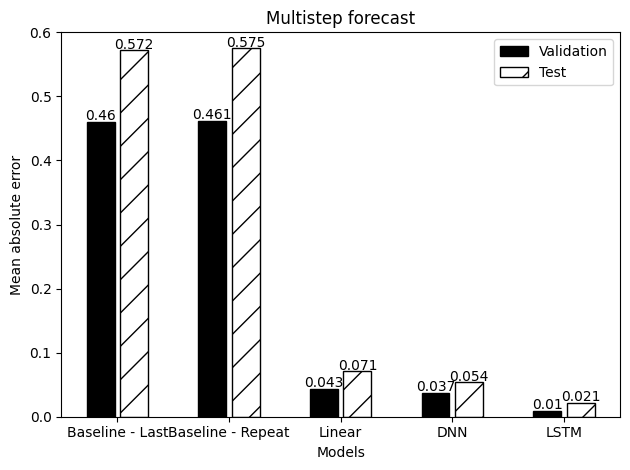

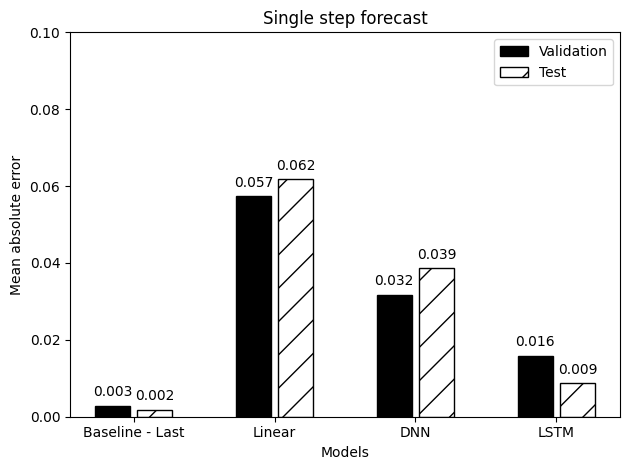

In [66]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

4- Long short term memory (LSTM) model 

4.1 LSTM single step model

In [48]:
ss_lstm_model = Sequential([
    LSTM(units=32, return_sequences=True),
    Dense(units=1)
])

In [51]:
history = compile_and_fit(model=ss_lstm_model, window=single_step_window)
val_performance['LSTM'] = ss_lstm_model.evaluate(single_step_window.val)
performance['LSTM'] = ss_lstm_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 3s 12ms/step - loss: 5.5484e-04 - mean_absolute_error: 0.0113 - val_loss: 1.2070e-04 - val_mean_absolute_error: 0.0078
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 5.2280e-04 - mean_absolute_error: 0.0111 - val_loss: 1.3878e-04 - val_mean_absolute_error: 0.0089
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 4.7375e-04 - mean_absolute_error: 0.0093 - val_loss: 1.1293e-04 - val_mean_absolute_error: 0.0077
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 5.0591e-04 - mean_absolute_error: 0.0098 - val_loss: 1.0135e-04 - val_mean_absolute_error: 0.0069
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 4.6266e-04 - mean_absolute_error: 0.0083 - val_loss: 1.0483e-04 - val_mean_absolute_error: 0.0073
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 4.8039e-04 - mean_absolute_error: 0.0089 - val_loss: 1.3942e-04 - val_m

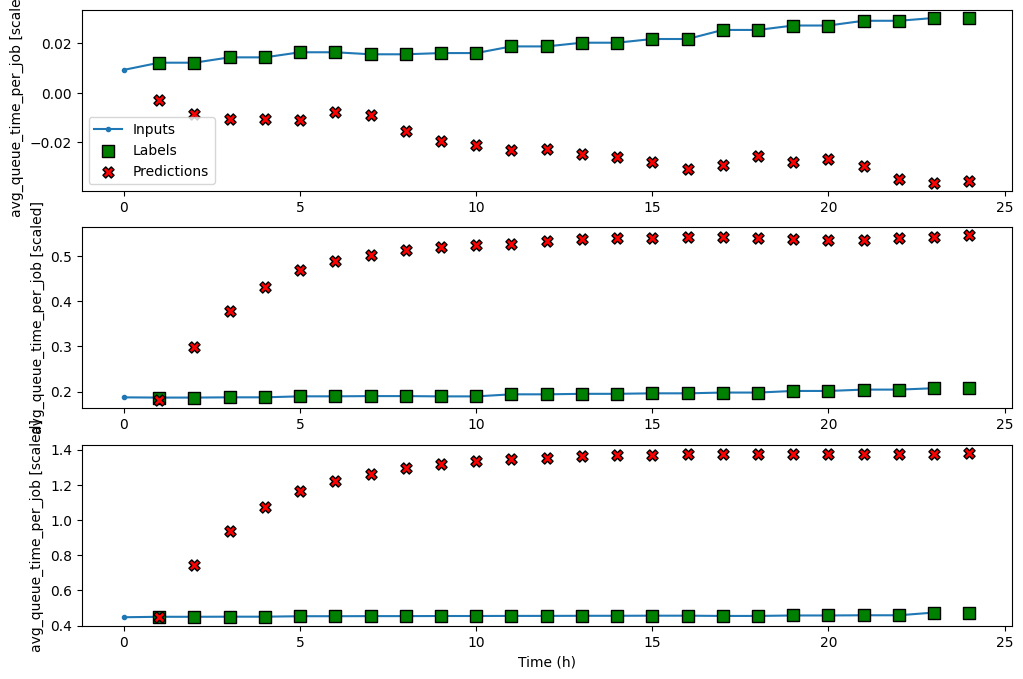

In [52]:
wide_window.plot(ss_lstm_model)

4.1 LSTM multistep model

In [113]:
ms_lstm_model = Sequential([
    LSTM(units=32, return_sequences=True),
    Dense(units=1, kernel_initializer=tf.initializers.zeros),
])

In [115]:
history = compile_and_fit(model=ms_lstm_model, window=multi_window)
ms_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 3s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0367 - val_loss: 0.0036 - val_mean_absolute_error: 0.0486
Epoch 2/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0028 - mean_absolute_error: 0.0339 - val_loss: 0.0038 - val_mean_absolute_error: 0.0507
Epoch 3/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0025 - mean_absolute_error: 0.0323 - val_loss: 0.0036 - val_mean_absolute_error: 0.0482
Epoch 4/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0310 - val_loss: 0.0040 - val_mean_absolute_error: 0.0540
Epoch 5/100
63/63 [==============================] - 1s 13ms/step - loss: 0.0021 - mean_absolute_error: 0.0297 - val_loss: 0.0036 - val_mean_absolute_error: 0.0486
Epoch 6/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0020 - mean_absolute_error: 0.0286 - val_loss: 0.0034 - val_mean_absolute_error: 0.0470
Epoch 7/100
63/6

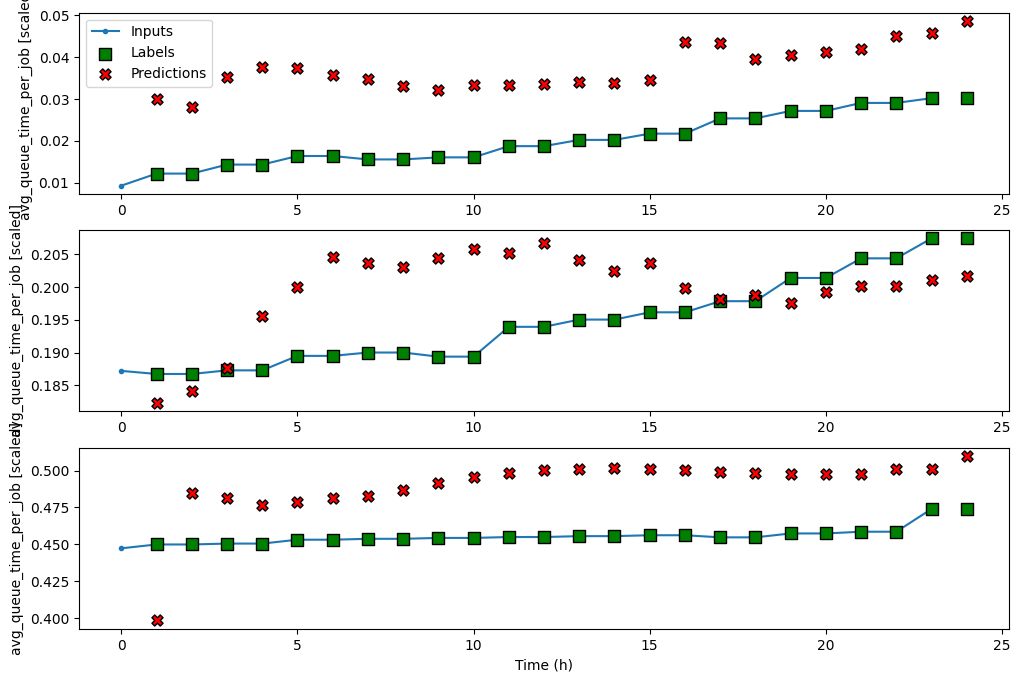

In [116]:
wide_window.plot(ms_lstm_model)

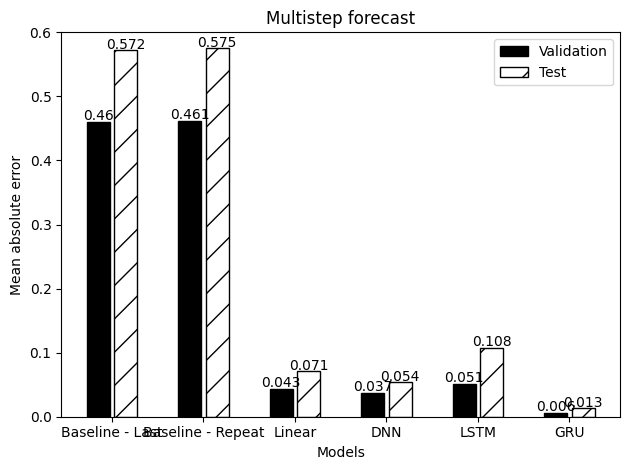

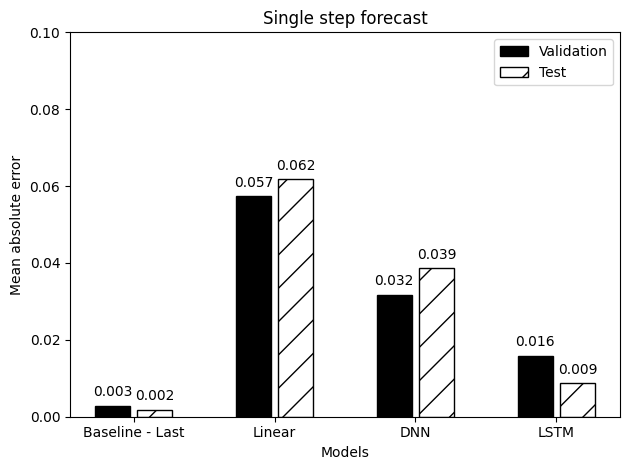

In [117]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

5- GRU multistep model

In [149]:
ms_gru_model = Sequential([
    GRU(units=64, return_sequences=True),
    Dense(units=1, kernel_initializer=tf.initializers.zeros),
])

In [155]:
history = compile_and_fit(model=ms_gru_model, window=multi_window)
ms_val_performance['GRU'] = ms_gru_model.evaluate(multi_window.val)
ms_performance['GRU'] = ms_gru_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 3s 20ms/step - loss: 0.0016 - mean_absolute_error: 0.0276 - val_loss: 0.0019 - val_mean_absolute_error: 0.0387
Epoch 2/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.0018 - val_mean_absolute_error: 0.0343
Epoch 3/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0257 - val_loss: 0.0019 - val_mean_absolute_error: 0.0382
Epoch 4/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0013 - mean_absolute_error: 0.0240 - val_loss: 0.0018 - val_mean_absolute_error: 0.0367
Epoch 5/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0012 - mean_absolute_error: 0.0233 - val_loss: 0.0021 - val_mean_absolute_error: 0.0399
Epoch 6/100
63/63 [==============================] - 1s 13ms/step - loss: 0.0012 - mean_absolute_error: 0.0233 - val_loss: 0.0020 - val_mean_absolute_error: 0.0389
Epoch 7/100
17/1

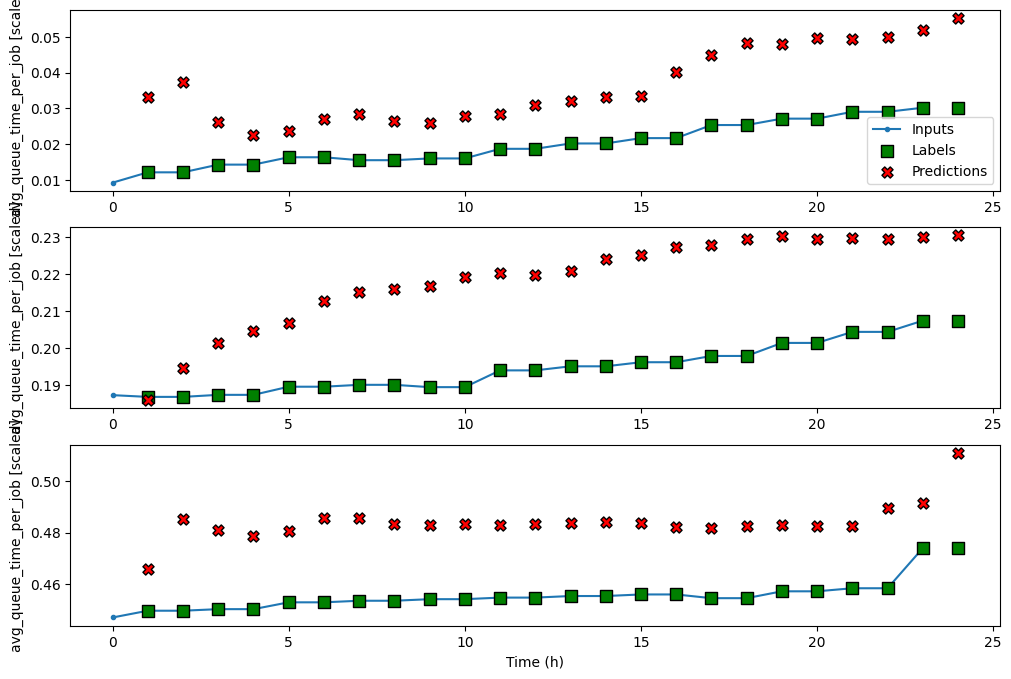

In [156]:
wide_window.plot(ms_gru_model)

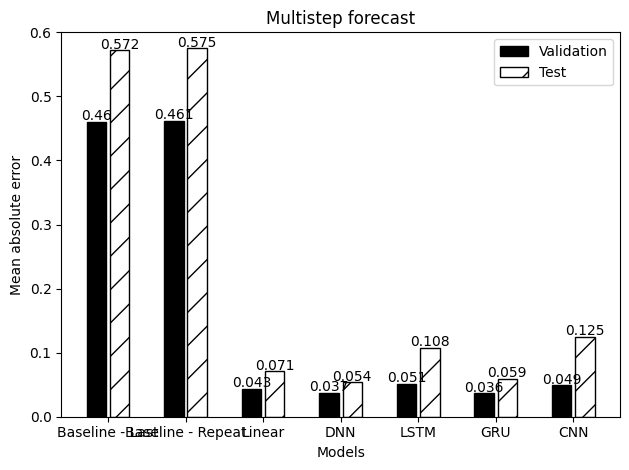

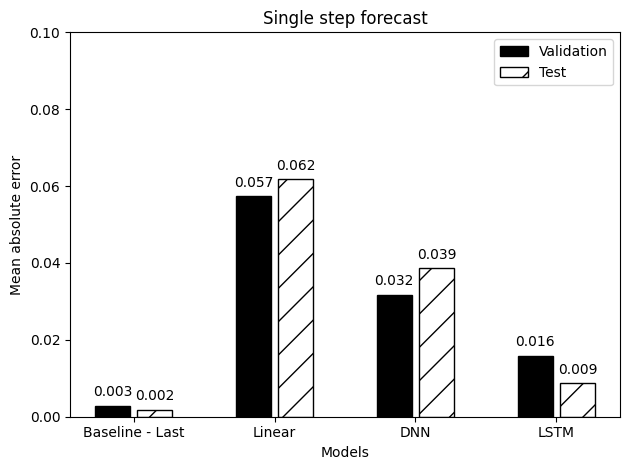

In [157]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

5- Convolutional Neural Network(CNN) multistep model

In [158]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1
multi_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=24, label_columns=['avg_queue_time_per_job'])
wide_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['avg_queue_time_per_job'])

In [159]:
ms_cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation="relu"),
    Dense(units=25, activation="relu"),
    Dense(units=1, kernel_initializer=tf.initializers.zeros)
])

In [161]:
history = compile_and_fit(model=ms_cnn_model, window=multi_conv_window)
ms_val_performance['CNN'] = ms_cnn_model.evaluate(multi_conv_window.val)
ms_performance['CNN'] = ms_cnn_model.evaluate(multi_conv_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0358 - val_loss: 0.0020 - val_mean_absolute_error: 0.0362
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0350 - val_loss: 0.0018 - val_mean_absolute_error: 0.0332
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0319 - val_loss: 0.0018 - val_mean_absolute_error: 0.0337
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0306 - val_loss: 0.0020 - val_mean_absolute_error: 0.0339
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0354


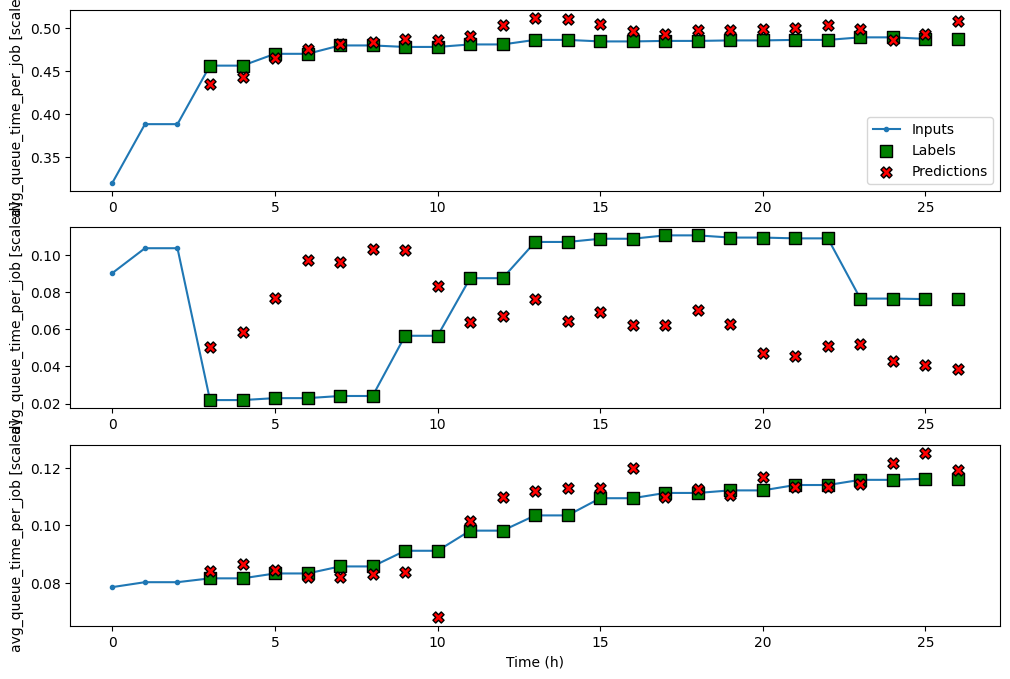

In [162]:
wide_conv_window.plot(ms_cnn_model)

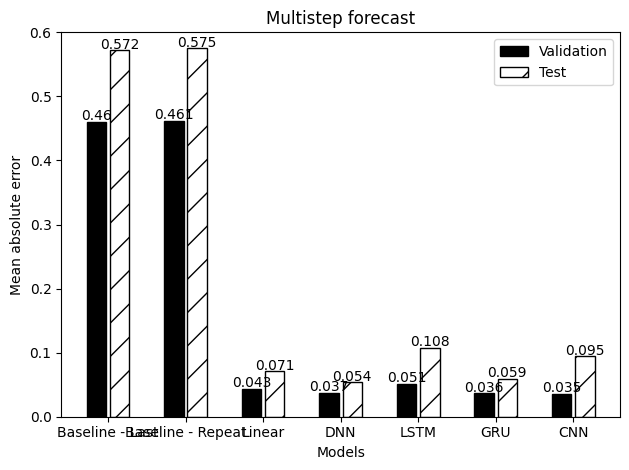

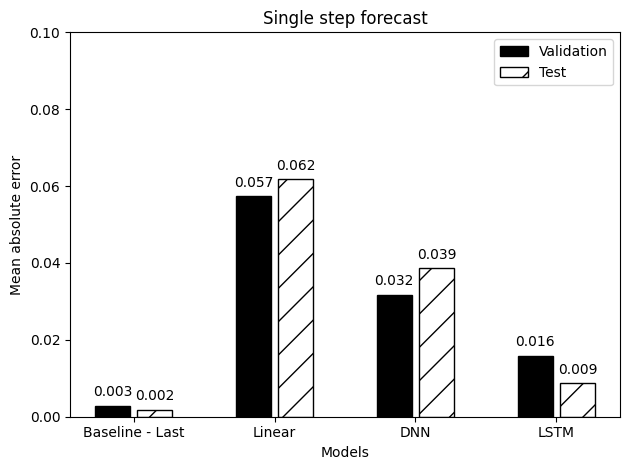

In [163]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

6- CNN + LSTM multistep model

In [170]:
ms_cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=(KERNEL_WIDTH,), activation="relu"),
    LSTM(units=64, return_sequences=True),
    Dense(units=1, kernel_initializer=tf.initializers.zeros)
])

In [173]:
history = compile_and_fit(model=ms_cnn_lstm_model, window=multi_conv_window)
ms_val_performance['CNN + LSTM'] = ms_cnn_model.evaluate(multi_conv_window.val)
ms_performance['CNN + LSTM'] = ms_cnn_model.evaluate(multi_conv_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 3s 22ms/step - loss: 0.0018 - mean_absolute_error: 0.0288 - val_loss: 0.0023 - val_mean_absolute_error: 0.0380
Epoch 2/100
63/63 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_absolute_error: 0.0213 - val_loss: 0.0026 - val_mean_absolute_error: 0.0385
Epoch 3/100
63/63 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_absolute_error: 0.0209 - val_loss: 0.0024 - val_mean_absolute_error: 0.0380
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0354


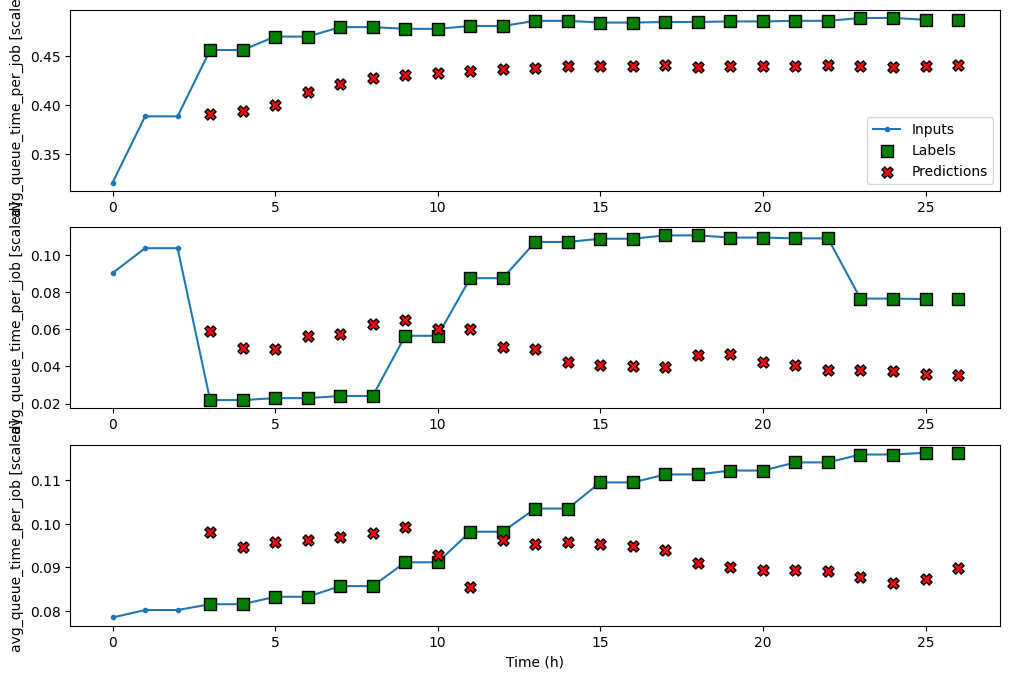

In [174]:
wide_conv_window.plot(ms_cnn_lstm_model)

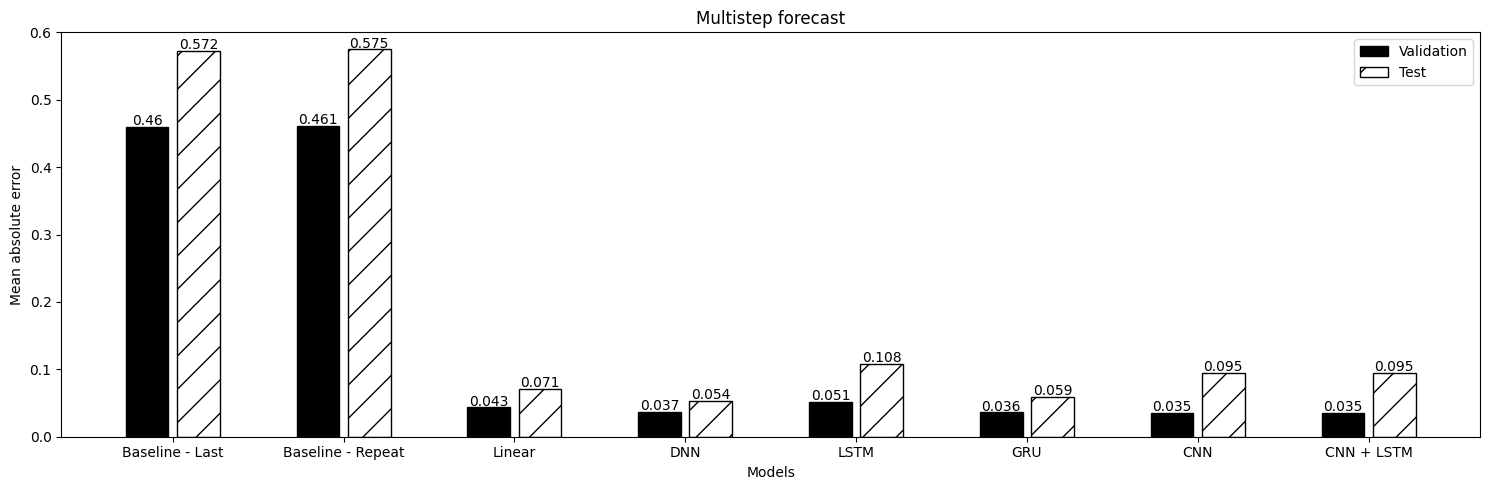

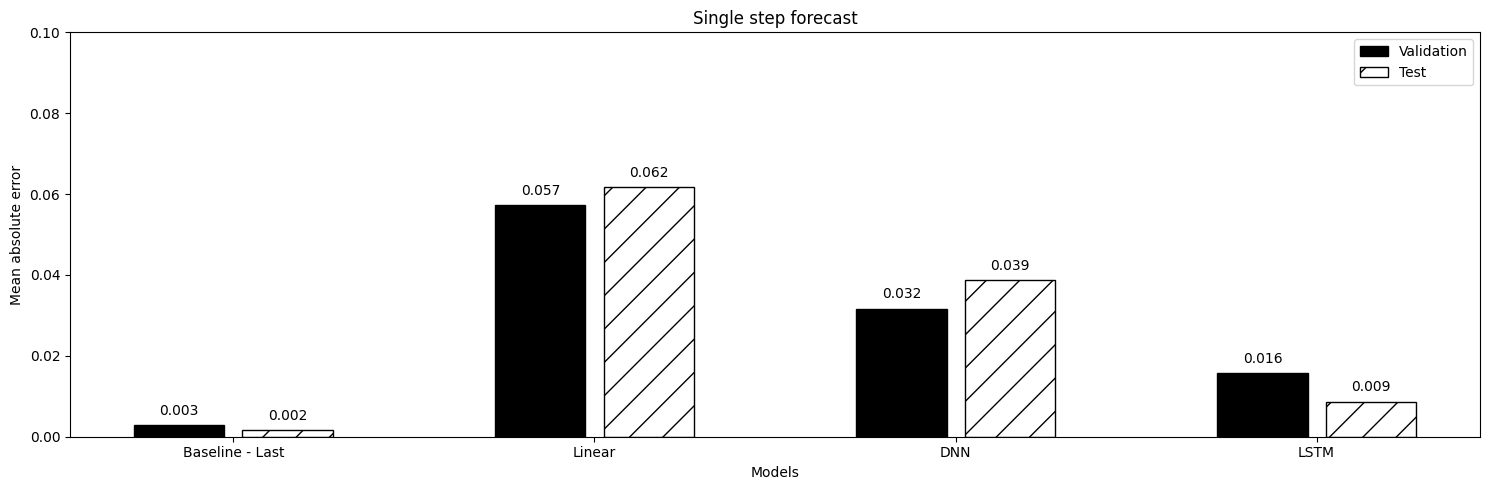

In [177]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

Autoregressive LSTM (ARLSTM)

In [178]:
class AutoRegressive(Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = LSTMCell(units)
        self.lstm_rnn = RNN(self.lstm_cell, return_state=True)
        self.dense = Dense(train_df.shape[1])

    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        predictions = []
        prediction, state = self.warmup(inputs)
        predictions.append(prediction)
        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states=state, training=training)
            prediction = self.dense(x)
            predictions.append(prediction)
        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions


In [188]:
ar_multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['avg_queue_time_per_job'])

In [ ]:
AR_LSTM = AutoRegressive(units=32, out_steps=24)
history = compile_and_fit(AR_LSTM, ar_multi_window)

In [197]:
ms_val_performance['AR - LSTM'] = AR_LSTM.evaluate(ar_multi_window.val)
ms_performance['AR - LSTM'] = AR_LSTM.evaluate(ar_multi_window.test, verbose=0)

17/17 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0355


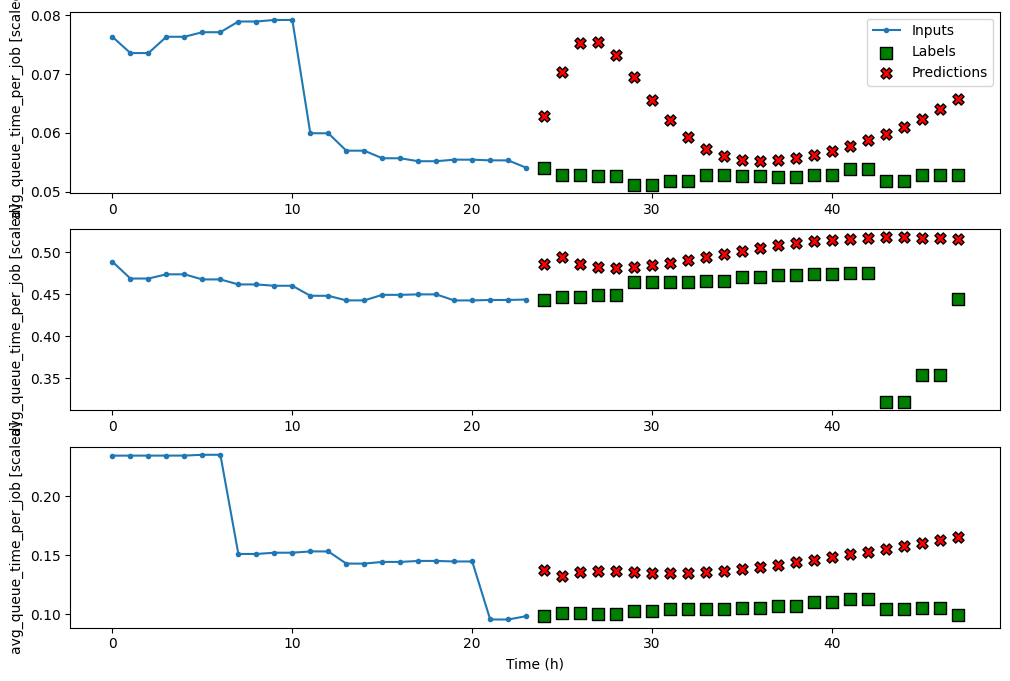

In [200]:
ar_multi_window.plot(AR_LSTM)

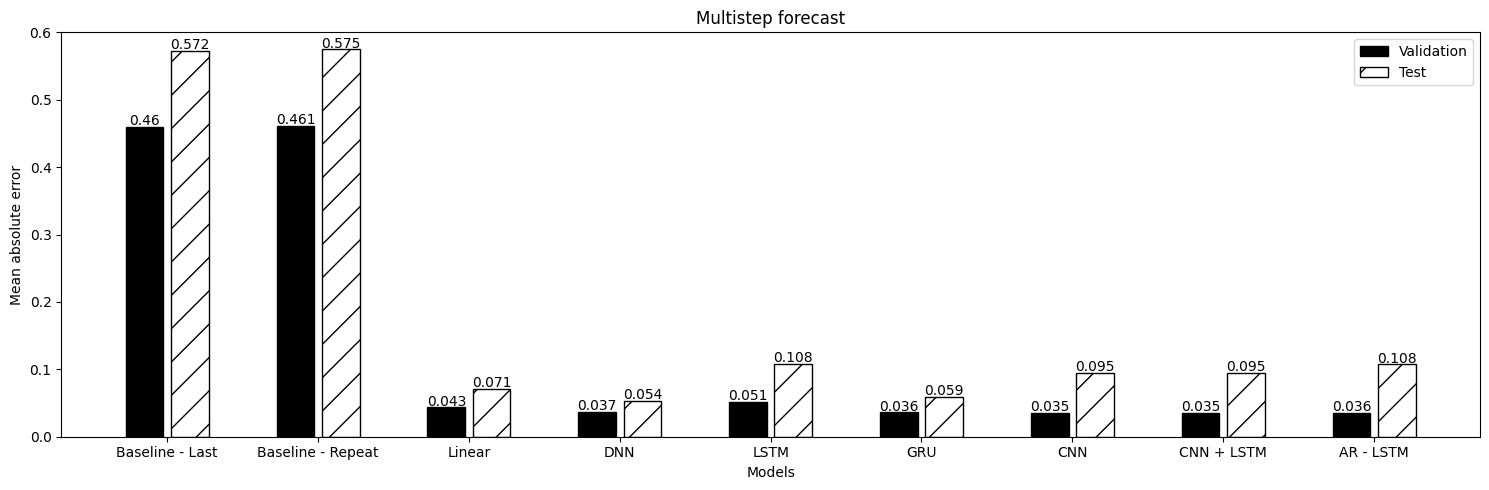

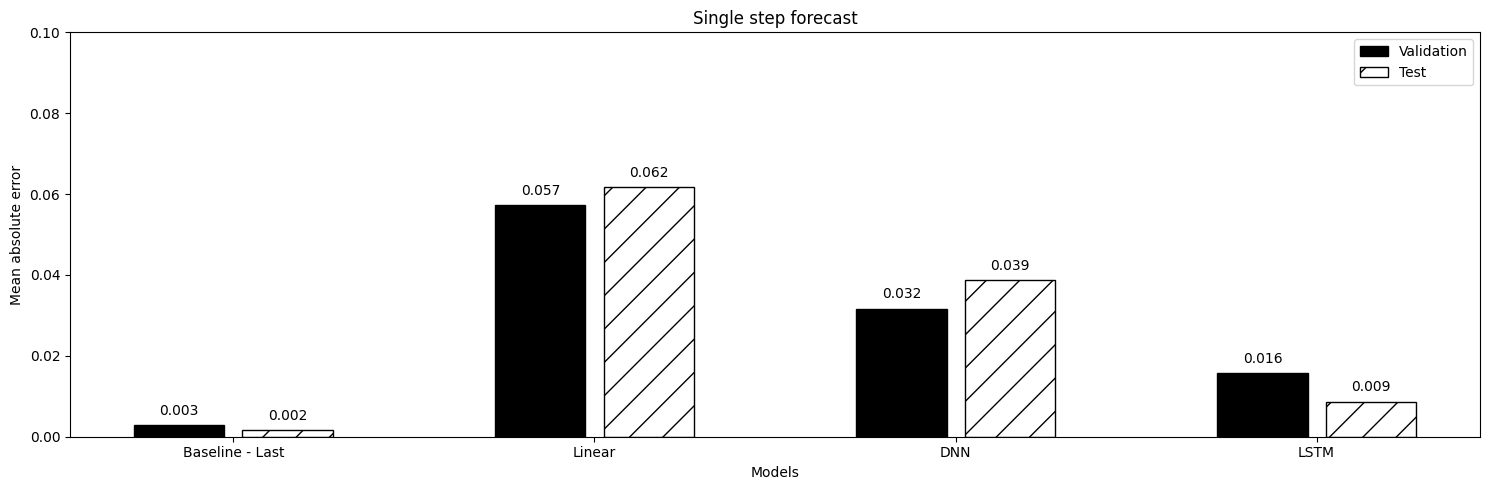

In [198]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

Neural Prophet

Whenever you use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:
- Time series column must be named “ds” and contain datetime values.
- Value column must be named “y” and contain float values.


In [254]:
df = pd.DataFrame(data=medium_df["avg_queue_time_per_job"], columns=["avg_queue_time_per_job"])
df['ds'] = medium_df.index
index = range(len(medium_df))
df.index = index
df.rename(columns={'avg_queue_time_per_job': 'y'}, inplace=True)
df.head()

,y,ds
0,61438.507519,2023-04-10 08:55:00
1,62478.297710,2023-04-10 09:00:00
2,62478.297710,2023-04-10 09:05:00
3,63063.246154,2023-04-10 09:10:00
4,63063.246154,2023-04-10 09:15:00


In [464]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
m = NeuralProphet()
#Use static plotly in notebooks
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)


Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 154.93it/s]


Epoch 142: 100%|██████████| 142/142 [00:00<00:00, 271.05it/s, loss=0.00566, v_num=82, MAE=1.23e+4, RMSE=1.88e+4, Loss=0.00552, RegLoss=0.000]   


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 150.02it/s]


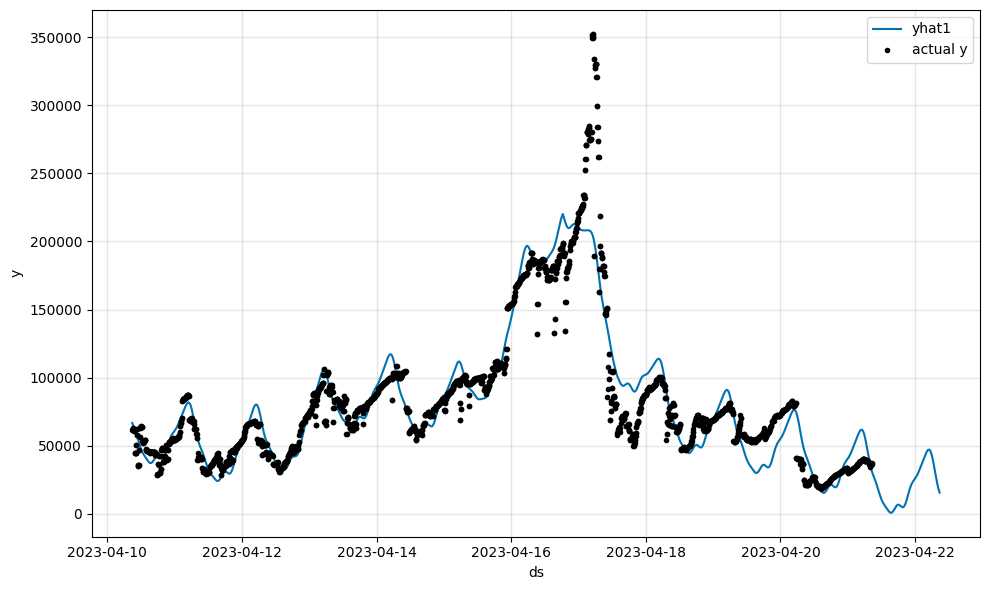

In [225]:
period = int((60*24)/5) # sampling every 5 min. This is the period of one day
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=period)
forecast = m.predict(df_future)
m.plot(forecast)

Analysing seasonality

Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 161.01it/s]


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 92.80it/s]


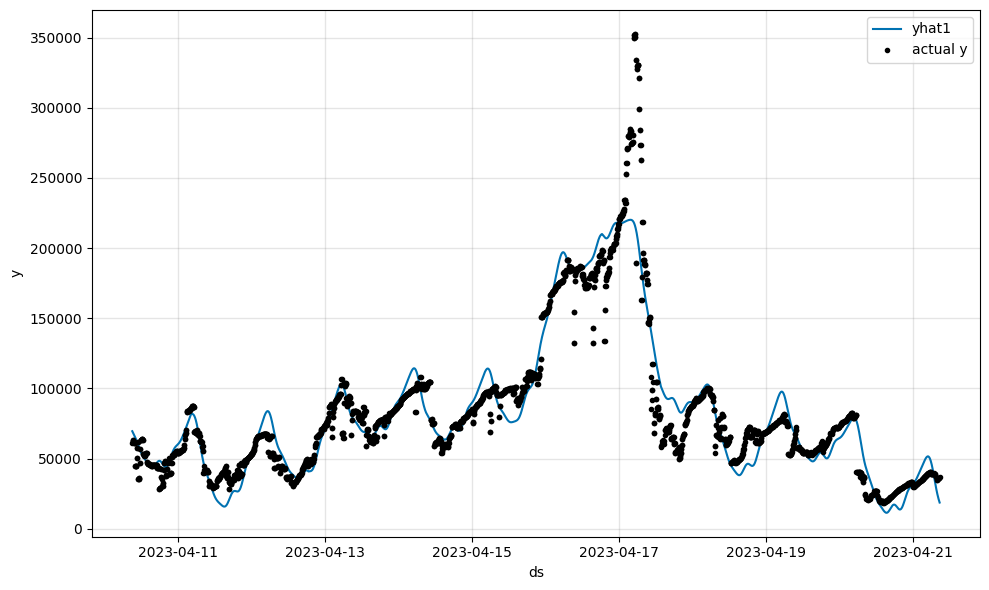

In [230]:
m = NeuralProphet(
    # Disable seasonality components, except daily
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
)
metrics = m.fit(df)
forecast = m.predict(df)
m.set_plotting_backend("matplotlib")
m.plot(forecast)

Residuals

In [237]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
#fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [240]:
def plot_data_frame(df, x_label, y_label):
    fig, ax = plt.subplots()
    x = df[x_label]
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.set_size_inches(15, 5)
    ax.plot(time_index, df[y_label])
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

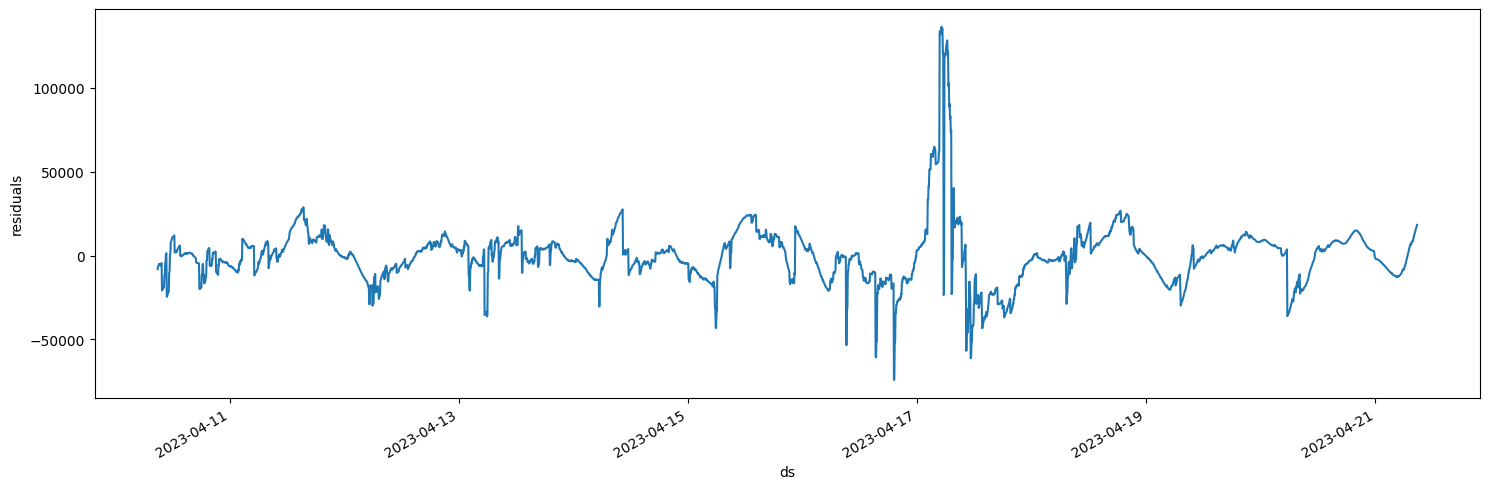

In [241]:
plot_data_frame(df_residuals, "ds", "residuals")

Autoregression

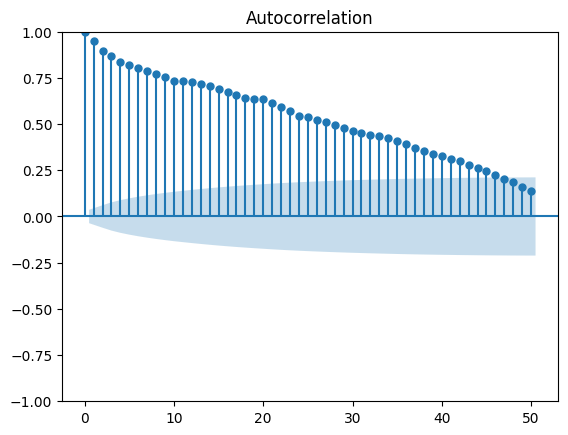

In [242]:
from statsmodels.graphics.tsaplots import plot_acf
plt = plot_acf(df_residuals["residuals"], lags=50)

Finding best initial lr: 100%|██████████| 237/237 [00:01<00:00, 128.23it/s]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 100.27it/s]


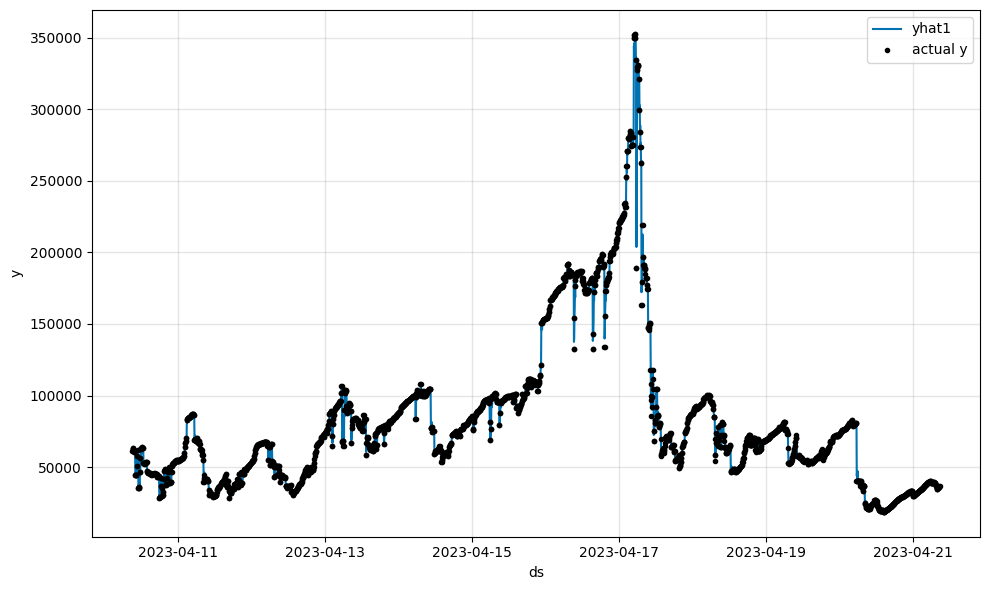

In [255]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5,
)
m.set_plotting_backend("matplotlib")
ar_metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

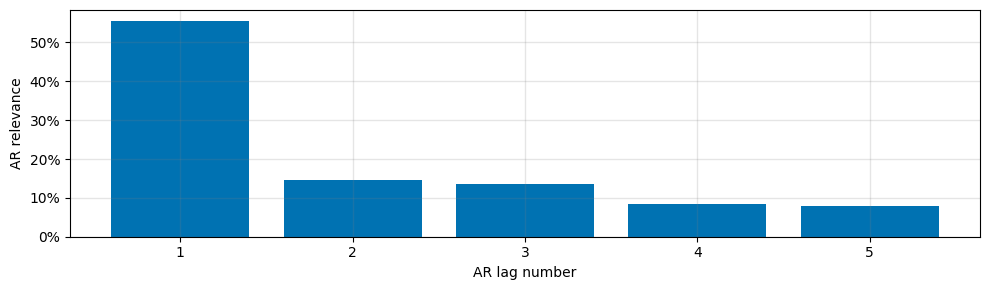

In [246]:
m.plot_parameters(components=["autoregression"])

Lagged regressors

In [257]:
# Features selected by percentile selection (25%)
selected_columns = ['avg_queue_time_per_job', 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes']
df_lr = pd.DataFrame(data=medium_df[selected_columns], columns=selected_columns)
df_lr['ds'] = medium_df.index
index = range(len(medium_df))
df_lr.index = index
df_lr.rename(columns={'avg_queue_time_per_job': 'y'}, inplace=True)
df_lr.head()

,y,avg_running_jobs,node_alloc,node_idle,node_total,nodes,ds
0,61438.507519,220.0,556.0,807.0,1363.0,1363.0,2023-04-10 08:55:00
1,62478.297710,216.0,547.0,816.0,1363.0,1363.0,2023-04-10 09:00:00
2,62478.297710,216.0,547.0,816.0,1363.0,1363.0,2023-04-10 09:05:00
3,63063.246154,214.0,544.0,819.0,1363.0,1363.0,2023-04-10 09:10:00
4,63063.246154,214.0,544.0,819.0,1363.0,1363.0,2023-04-10 09:15:00


Finding best initial lr: 100%|██████████| 237/237 [00:01<00:00, 126.59it/s]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 82.97it/s]


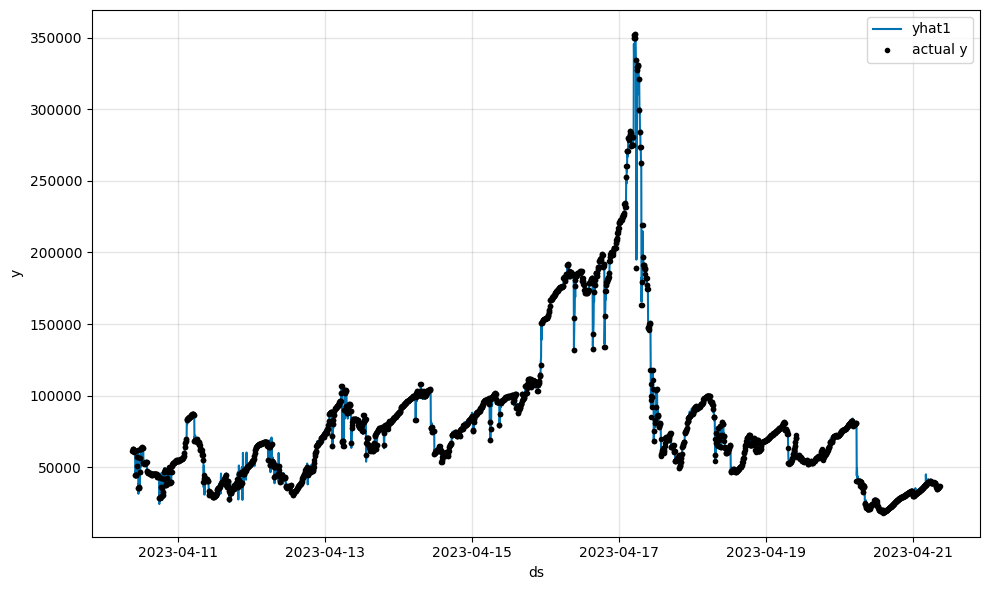

In [258]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5,
)
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
m.add_lagged_regressor("avg_running_jobs")
m.add_lagged_regressor("node_alloc")
m.add_lagged_regressor("node_idle")
m.add_lagged_regressor("node_total")
m.add_lagged_regressor("nodes")

lr_metrics = m.fit(df_lr)
forecast = m.predict(df_lr)
m.plot(forecast)

When comparing training metrics from AR and Lagged Regressors, the MAE and RMSE is higher in the latter, despite the loss is lower

In [259]:
ar_metrics, lr_metrics

(              MAE          RMSE      Loss  RegLoss  epoch
 0    1.055173e+06  1.099515e+06  4.347511      0.0      0
 1    9.568348e+05  9.987134e+05  3.903606      0.0      1
 2    8.312009e+05  8.698113e+05  3.336173      0.0      2
 3    6.658964e+05  6.996221e+05  2.594350      0.0      3
 4    4.601165e+05  4.865762e+05  1.675933      0.0      4
 ..            ...           ...       ...      ...    ...
 134  1.609479e+03  3.833713e+03  0.000410      0.0    134
 135  1.580541e+03  3.739575e+03  0.000407      0.0    135
 136  1.569676e+03  3.738829e+03  0.000406      0.0    136
 137  1.572872e+03  3.741204e+03  0.000405      0.0    137
 138  1.577969e+03  3.737606e+03  0.000405      0.0    138
 
 [139 rows x 5 columns],
                MAE           RMSE      Loss  RegLoss  epoch
 0    259763.171875  313753.531250  0.867284      0.0      0
 1    220597.437500  269479.343750  0.694803      0.0      1
 2    181403.187500  223235.328125  0.523652      0.0      2
 3    143742.437500  

Future Regressor

Finding best initial lr: 100%|██████████| 237/237 [00:01<00:00, 126.14it/s]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 76.03it/s]


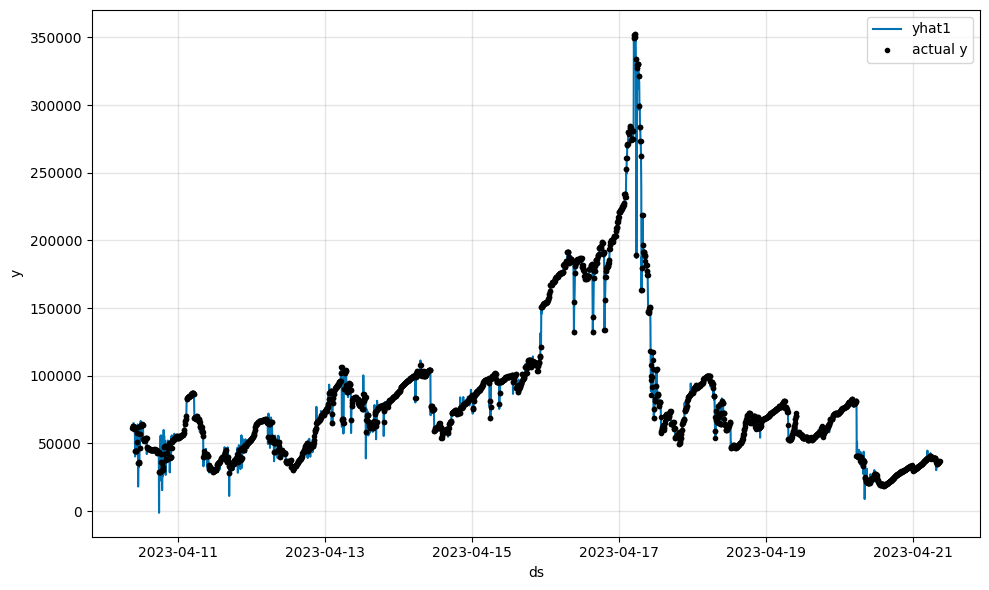

In [260]:
m = NeuralProphet(
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=5,
)
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
m.add_future_regressor("avg_running_jobs")
m.add_future_regressor("node_alloc")
m.add_future_regressor("node_idle")
m.add_future_regressor("node_total")
m.add_future_regressor("nodes")

fr_metrics = m.fit(df_lr)
forecast = m.predict(df_lr)
m.plot(forecast)

Future regressors obtain better performance

In [262]:
lr_metrics, fr_metrics

(               MAE           RMSE      Loss  RegLoss  epoch
 0    259763.171875  313753.531250  0.867284      0.0      0
 1    220597.437500  269479.343750  0.694803      0.0      1
 2    181403.187500  223235.328125  0.523652      0.0      2
 3    143742.437500  178190.437500  0.364310      0.0      3
 4    107506.898438  131959.312500  0.219973      0.0      4
 ..             ...            ...       ...      ...    ...
 134    1748.845337    3828.792969  0.000389      0.0    134
 135    1743.692017    3831.070068  0.000389      0.0    135
 136    1745.306763    3881.401611  0.000389      0.0    136
 137    1742.820068    3849.136719  0.000388      0.0    137
 138    1738.786987    3788.277832  0.000388      0.0    138
 
 [139 rows x 5 columns],
                MAE           RMSE      Loss  RegLoss  epoch
 0    453420.406250  569994.687500  1.587418      0.0      0
 1    395220.875000  497349.343750  1.329406      0.0      1
 2    326637.000000  411781.750000  1.039718      0.0     

Uncertaintly

In [264]:
confidence_level = 0.9
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 161.66it/s]


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 115.09it/s]


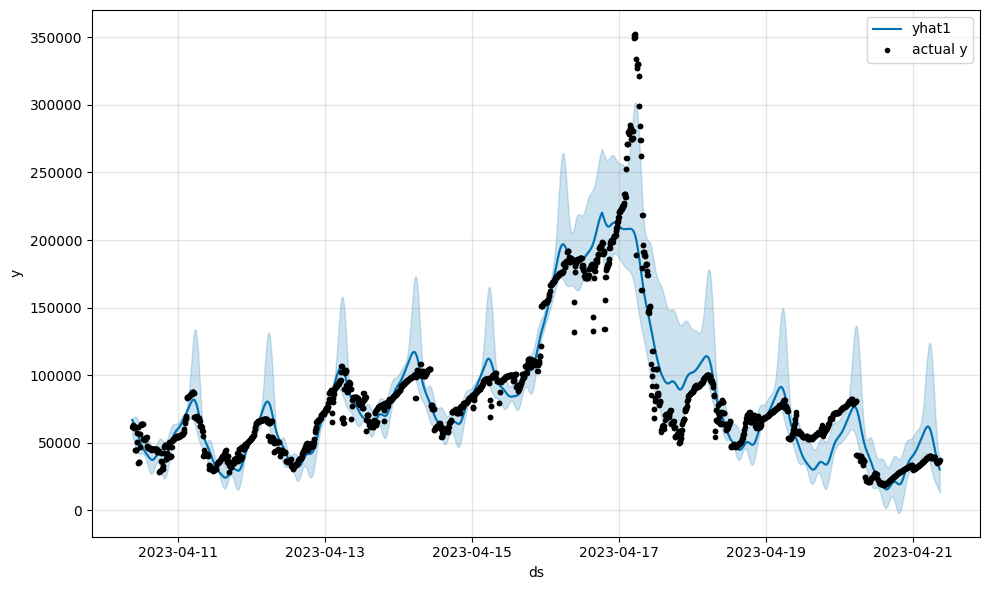

In [267]:
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("matplotlib")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

For the above method we used a quantile regression model, that uses the pinball loss function to assess the goodness-of-fit. While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee marginal coverage for unseen data

In [ ]:
# evaluate uncertainy on calibration set
# FIXME: conformal_predict does not work with pandas 2.X
# Installing latest candidate version of NeuralProphet does not fix this issue
train_df, val_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, val_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

Validation

In [ ]:
m = NeuralProphet(
    #yearly_seasonality=False,
    #weekly_seasonality=True,
    #daily_seasonality=True,
    #n_lags=5,
    #quantiles=quantiles
    )
m.set_plotting_backend("matplotlib")
# Add lagged regressor for additional features: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'
# m.add_future_regressor("avg_running_jobs")
# m.add_future_regressor("node_alloc")
# m.add_future_regressor("node_idle")
# m.add_future_regressor("node_total")
# m.add_future_regressor("nodes")

# df_train, df_test = m.split_df(df_lr, valid_p=0.1)
# metrics = m.fit(df_train, validation_df=df_test, progress=None)
df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)
metrics_train = m.fit(df=df_train, freq="5min")
metrics_test = m.test(df=df_test)

Comparing training and testing metrics we see this model faces high overfitting

In [366]:
metrics_train

,MAE,RMSE,Loss,RegLoss,epoch
0,276344.000000,310650.343750,0.908650,0.0,0
1,263077.687500,297225.312500,0.848701,0.0,1
2,246244.328125,279061.781250,0.772785,0.0,2
3,222628.984375,253715.640625,0.667693,0.0,3
4,191178.828125,219588.765625,0.531819,0.0,4
...,...,...,...,...,...
146,15625.045898,23691.035156,0.009731,0.0,146
147,15566.919922,23703.826172,0.009766,0.0,147
148,15573.815430,23547.964844,0.009747,0.0,148
149,15598.347656,23738.205078,0.009854,0.0,149


In [367]:
metrics_test

,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,102110.789062,112207.9375,0.216253,0.0


In [372]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics_train2 = m.fit(df=df, freq="5min")

Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 147.48it/s]


Epoch 142: 100%|██████████| 142/142 [00:00<00:00, 347.06it/s, loss=0.00635, v_num=47, MAE=1.23e+4, RMSE=1.87e+4, Loss=0.00552, RegLoss=0.000]   


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 176.74it/s]


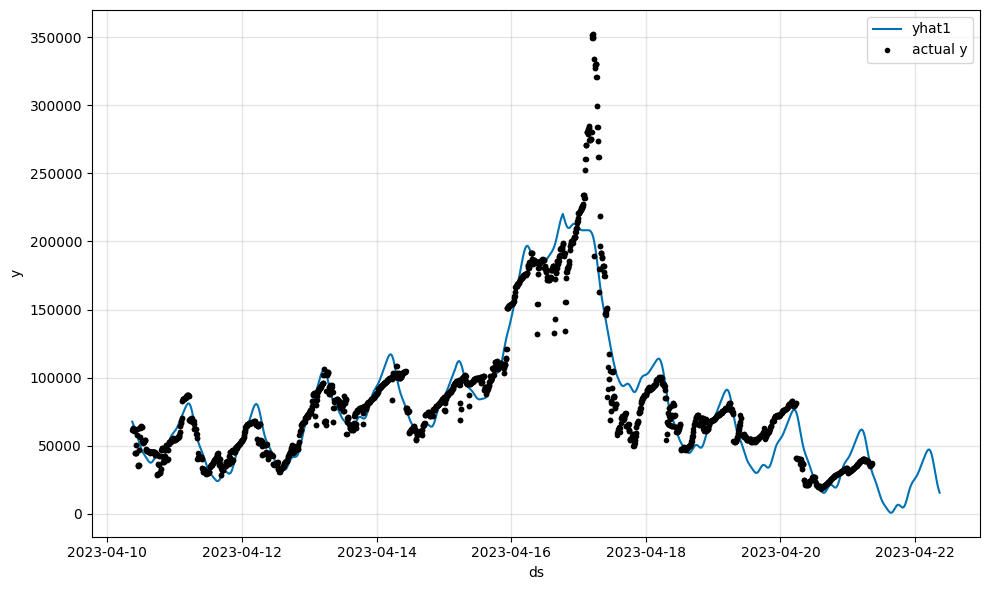

In [373]:
aday_period = int(60*24/5)

future = m.make_future_dataframe(df, periods=aday_period, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast)

Visualize training progress. In blue the train loss, in orange the validation loss. This model is facing overfitting

Finding best initial lr: 100%|██████████| 234/234 [00:01<00:00, 172.76it/s]


Epoch 151: 100%|██████████| 151/151 [00:00<00:00, 360.40it/s, loss=0.0109, v_num=19, MAE_val=1.02e+5, RMSE_val=1.12e+5, Loss_val=0.216, RegLoss_val=0.000, MAE=1.55e+4, RMSE=2.35e+4, Loss=0.00972, RegLoss=0.000]   


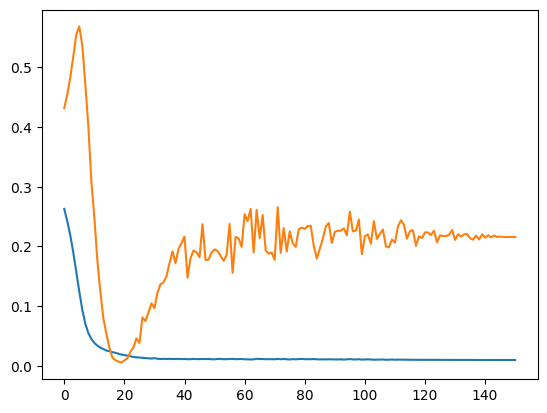

In [289]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)
metrics = m.fit(df=df_train, freq="5min", validation_df=df_test, progress="plot")

In [290]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
150,102058.421875,112149.039062,0.216027,0.0,150,15549.501953,23526.714844,0.009717,0.0


Time series cross-validation

In [374]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {}

folds = NeuralProphet(**params).crossvalidation_split_df(df, freq="5min", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

In [375]:
def add_row(df, values):
    new_df = pd.DataFrame(df)
    new_df.loc[-1] = values
    new_df.index = new_df.index + 1  # shifting index
    new_df = new_df.sort_index()
    return new_df

In [377]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train = m.fit(df=df_train, freq="5min")
    test = m.test(df=df_test)
    metrics_train = add_row(metrics_train, train[METRICS].iloc[-1].values)
    metrics_test = add_row(metrics_test, test[METRICS_VAL].iloc[-1].values)

Finding best initial lr: 100%|██████████| 227/227 [00:01<00:00, 135.73it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 83.83it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.15020552277565002
         MAE_val              29336.107421875
        RMSE_val              39773.21484375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 229/229 [00:01<00:00, 160.32it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 71.53it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.7343173027038574
         MAE_val                 84138.75
        RMSE_val               98273.3984375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 231/231 [00:01<00:00, 179.87it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 85.45it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.5499296188354492
         MAE_val                132202.1875
        RMSE_val                164278.625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 233/233 [00:01<00:00, 178.52it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 67.04it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test            0.652000904083252
         MAE_val               201397.453125
        RMSE_val               204538.390625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 234/234 [00:01<00:00, 138.86it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.83it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.21597883105278015
         MAE_val               102046.609375
        RMSE_val              112135.9921875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [378]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE_val,RMSE_val
mean,109824.221484,123799.924219
std,63413.329271,63256.153637
min,29336.107422,39773.214844
max,201397.453125,204538.390625


Train, Validate and Test procedure

In [379]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="5min", valid_p=0.2)

# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="5min", valid_p=0.2)

# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="5min")
metrics_val = m.test(df=df_val)

# refit model on training and validation data and evaluate on test set.
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics_train2 = m.fit(df=df_train_val, freq="5min")
metrics_test = m.test(df=df_test)

Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 153.96it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 61.35it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.6808285117149353
         MAE_val               171323.53125
        RMSE_val                 193818.75
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 234/234 [00:01<00:00, 139.40it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.57it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.2154766470193863
         MAE_val               101899.703125
        RMSE_val              112005.4609375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [381]:
metrics_train1["split"] = "train1"
metrics_train2["split"] = "train2"
metrics_val["split"] = "validate"
metrics_test["split"] = "test"
metrics_train1.head(), metrics_train2.head(), metrics_val.head(), metrics_test.head()

(             MAE           RMSE      Loss  RegLoss  epoch   split
 0  129174.843750  158797.859375  0.342018      0.0      0  train1
 1  124247.476562  152994.609375  0.321787      0.0      1  train1
 2  118995.476562  146621.718750  0.299845      0.0      2  train1
 3  111955.515625  137692.078125  0.268175      0.0      3  train1
 4  101965.710938  125115.484375  0.228753      0.0      4  train1,
              MAE          RMSE      Loss  RegLoss  epoch   split
 0  324145.406250  338335.78125  1.067352      0.0      0  train2
 1  309226.843750  323841.09375  0.998800      0.0      1  train2
 2  289363.156250  304317.18750  0.908571      0.0      2  train2
 3  262569.687500  278034.25000  0.788130      0.0      3  train2
 4  226325.328125  241177.06250  0.626792      0.0      4  train2,
         MAE_val   RMSE_val  Loss_test  RegLoss_test     split
 0  171323.53125  193818.75   0.680829           0.0  validate,
          MAE_val       RMSE_val  Loss_test  RegLoss_test split
 0  10189

In [405]:
metrics_train1_last = metrics_train1.tail(1).drop(columns=["epoch", "RegLoss"])
metrics_train2_last = metrics_train2.tail(1).drop(columns=["epoch", "RegLoss"])
metrics_val_last = metrics_val.tail(1).drop(columns=["RegLoss_test"]).rename(columns={"Loss_test":"Loss", "MAE_val":"MAE", "RMSE_val":"RMSE"})
metrics_test_last = metrics_test.tail(1).drop(columns=["RegLoss_test"]).rename(columns={"Loss_test":"Loss", "MAE_val":"MAE", "RMSE_val":"RMSE"})
metrics_train1_last, metrics_train2_last, metrics_val_last, metrics_test_last

(             MAE         RMSE      Loss   split
 160  5664.128906  7715.820312  0.000986  train1,
               MAE          RMSE      Loss   split
 150  15607.041016  23522.519531  0.009731  train2,
             MAE       RMSE      Loss     split
 0  171323.53125  193818.75  0.680829  validate,
              MAE           RMSE      Loss split
 0  101899.703125  112005.460938  0.215477  test)

Again a huge overfitting is visible from validation/test results
TODO: Try to tune hyperparameters.
According to NeuralNetwork documentation: 
If it looks like the model is overfitting to the training data (the live loss plot can be useful hereby), you can reduce epochs and learning_rate, and potentially increase the batch_size. If it is underfitting, the number of epochs and learning_rate can be increased and the batch_size potentially decreased.

In [411]:
pd.concat([metrics_train1_last, metrics_train2_last, metrics_val_last, metrics_test_last])

,MAE,RMSE,Loss,split
160,5664.128906,7715.820312,0.000986,train1
150,15607.041016,23522.519531,0.009731,train2
0,171323.531250,193818.750000,0.680829,validate
0,101899.703125,112005.460938,0.215477,test


Train, Cross-Validate and Cross-Test evaluation

In [412]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {}

folds_val, folds_test = NeuralProphet(**params).double_crossvalidation_split_df(
    df, freq="5min", k=5, valid_pct=0.10, test_pct=0.10
)

In [414]:
metrics_train1 = pd.DataFrame(columns=METRICS)
metrics_val = pd.DataFrame(columns=METRICS_VAL)
for df_train1, df_val in folds_val:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train1 = m.fit(df=df_train, freq="5min")
    val = m.test(df=df_val)
    metrics_train1 = add_row(metrics_train1, train1[METRICS].iloc[-1].values)
    metrics_val = add_row(metrics_val, val[METRICS_VAL].iloc[-1].values)

metrics_train2 = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)
for df_train2, df_test in folds_test:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train2 = m.fit(df=df_train2, freq="5min")
    test = m.test(df=df_test)
    metrics_train2 = add_row(metrics_train2, train2[METRICS].iloc[-1].values)
    metrics_test = add_row(metrics_test, test[METRICS_VAL].iloc[-1].values)
    

Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 176.92it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 81.70it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           1.2959356307983398
         MAE_val               280942.40625
        RMSE_val               281011.96875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 175.13it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 82.65it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           1.5203509330749512
         MAE_val                316048.1875
        RMSE_val               316150.28125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 128.39it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 90.50it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test            1.666072130203247
         MAE_val               338843.71875
        RMSE_val                338990.8125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 198.80it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 78.78it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           1.7696627378463745
         MAE_val                355048.625
        RMSE_val               355079.09375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 232/232 [00:01<00:00, 193.73it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.25it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           1.8137072324752808
         MAE_val                361938.625
        RMSE_val               361977.65625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 235/235 [00:01<00:00, 151.11it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.00it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03839410841464996
         MAE_val               46199.609375
        RMSE_val              46338.01171875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 165.39it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 102.08it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0071127465926110744
         MAE_val              16930.701171875
        RMSE_val              19832.037109375
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 226.19it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 73.72it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0010908201802521944
         MAE_val             7883.92041015625
        RMSE_val              8102.3486328125
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 145.81it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 88.37it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.005739263258874416
         MAE_val               17416.3359375
        RMSE_val              18684.998046875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 176.76it/s]


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 76.67it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.014577479101717472
         MAE_val                28015.5625
        RMSE_val              29592.59765625
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [416]:
metrics_train2.describe().loc[["mean", "std"]], metrics_val.describe().loc[["mean", "std"]], metrics_test.describe().loc[["mean", "std"]]

(               MAE          RMSE
 mean  12537.630859  19303.627148
 std    2091.380678   3544.680949,
             MAE_val       RMSE_val
 mean  330564.312500  330641.962500
 std    32883.997157   32870.760137,
            MAE_val      RMSE_val
 mean  23289.225879  24509.998633
 std   14658.351196  14381.584600)

Trying to reduce overfitting:
According to NeuralNetwork documentation: 
If it looks like the model is overfitting to the training data (the live loss plot can be useful hereby), you can reduce epochs and learning_rate, and potentially increase the batch_size. If it is underfitting, the number of epochs and learning_rate can be increased and the batch_size potentially decreased.
check model config hyperpameters:
m.config_train

Epoch 151: 100%|██████████| 151/151 [00:00<00:00, 261.57it/s, loss=0.00574, v_num=78, MAE_val=2.11e+4, RMSE_val=2.6e+4, Loss_val=0.0116, RegLoss_val=0.000, MAE=1.48e+4, RMSE=2.1e+4, Loss=0.00687, RegLoss=0.000]    


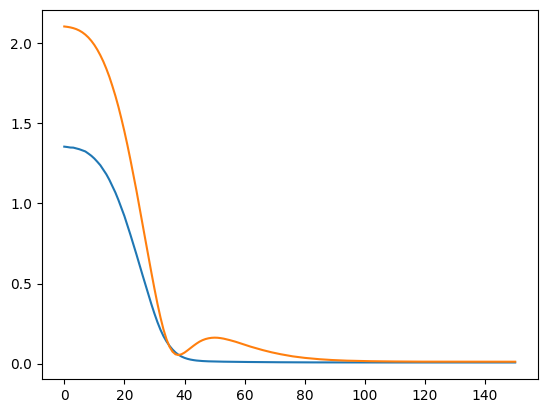

In [439]:
m = NeuralProphet(
    daily_seasonality=True,
    weekly_seasonality=True,
    #n_lags=5,
)
m.set_plotting_backend("matplotlib")

df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.2,)
metrics = m.fit(
    df=df_train, 
    freq="5min", 
    validation_df=df_test, 
    progress="plot",
    learning_rate=0.001,
    #batch_size=aday_period
)


In [440]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
150,21127.785156,26008.638672,0.011624,0.0,150,14813.114258,20974.341797,0.006867,0.0


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 105.17it/s]


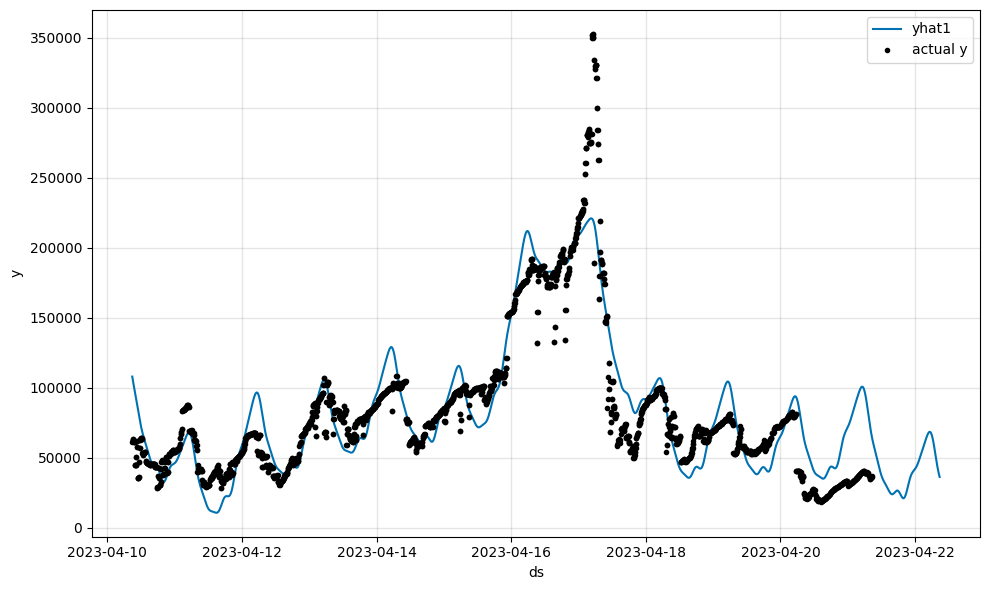

In [441]:
future = m.make_future_dataframe(df, periods=aday_period, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast)

Uncertainty Quantification

1- Quantile regression

In [442]:
m = NeuralProphet()
train_df, test_df = m.split_df(df, freq="5min", valid_p=1.0 / 16)

In [446]:
confidence_lv = 0.9 # 90% confidence interval
quantile_list = [round(((1 - confidence_lv) / 2), 2), round((confidence_lv + (1 - confidence_lv) / 2), 2)]

# Create NeuralProphet object with list of quantile as parameter
qr_model = NeuralProphet(quantiles=quantile_list)
qr_model.set_plotting_backend("matplotlib")

In [447]:
metrics = qr_model.fit(df, freq="5min")
future = qr_model.make_future_dataframe(df, periods=aday_period, n_historic_predictions=True)
forecast = qr_model.predict(df=future)

Finding best initial lr: 100%|██████████| 236/236 [00:01<00:00, 142.86it/s]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 121.22it/s]


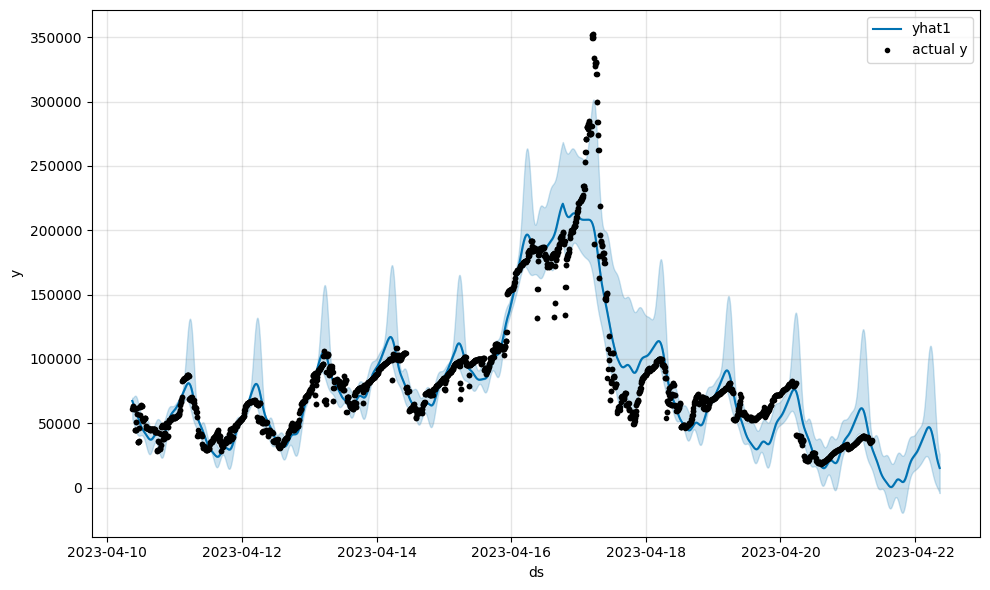

In [448]:
qr_model.plot(forecast)

2- Conformal prediction

In [458]:
from neuralprophet import NeuralProphet, uncertainty_evaluate, set_log_level, set_random_seed

In [449]:
train_df, cal_df = m.split_df(train_df, freq="5min", valid_p=1.0 / 11)

In [450]:
train_df.shape, cal_df.shape, test_df.shape

((2479, 2), (247, 2), (181, 2))

In [456]:
n_lags = 5

# Create a simple quantile regression model
cp_model1 = NeuralProphet(quantiles=quantile_list)
cp_model1.set_plotting_backend("matplotlib")

# Create a 4-layer autoregression model as the base
cp_model2 = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=n_lags,
    #num_hidden_layers=4,
    #d_hidden=32,
    learning_rate=0.003,
    quantiles=quantile_list,
)

In [459]:
set_random_seed(0)
metrics1 = cp_model1.fit(train_df, freq="5min")
set_random_seed(0)
metrics2 = cp_model2.fit(train_df, freq="5min")

Finding best initial lr: 100%|██████████| 235/235 [00:01<00:00, 141.13it/s]


Epoch 147: 100%|██████████| 147/147 [00:00<00:00, 182.85it/s, loss=0.00179, v_num=81, MAE=1.91e+3, RMSE=4.59e+3, Loss=0.00114, RegLoss=0.000]    


In [461]:
# Perform estimation for the testing data with the trained model
forecast1 = cp_model1.predict(test_df)[n_lags:]
forecast2 = cp_model2.predict(test_df)[n_lags:]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 90.29it/s] 


Option 1: Naive Conformal Prediction
FIXME: conformal_predict does not work with pandas 2.X
Installing latest candidate version of NeuralProphet does not fix this issue. Downgrading pandas is required

In [ ]:
# Parameter for naive conformal prediction
method = "naive"
alpha = 1 - confidence_lv

# Enable conformal predict on the pre-trained models
# Evaluate parameter is optional, refer to the "Evaluate Performance" session below
naive_forecast1 = cp_model1.conformal_predict(
    test_df,
    calibration_df=cal_df,
    alpha=alpha,
    method=method,
    plotting_backend="matplotlib",
    #show_all_PI=True,
)
naive_forecast2 = cp_model2.conformal_predict(
    test_df,
    calibration_df=cal_df,
    alpha=alpha,
    method=method,
    plotting_backend="matplotlib",
    #show_all_PI=True,
)